In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera, normaltest, boxcox, yeojohnson
from statsmodels.stats.diagnostic import lilliefors
from rapidfuzz import process, fuzz

In [2]:
df = pd.read_csv("dataset/autos.csv")

In [3]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
print("Dataset")
df.shape

Dataset


(371528, 21)

In [5]:
print("Dataset")
df.dtypes

Dataset


index                   int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [6]:
missing_values = df.isnull().sum()
print("Missing Values per Column:")
missing_values

Missing Values per Column:


index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
# Count of unique values in offerType
df.groupby('offerType').count()

,index,dateCrawled,name,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
offerType,,,,,,,,,,,,,,,,,,,,
Angebot,371516,371516,371516,371516,371516,371516,333654,371516,351313,371516,351035,371516,371516,338137,371516,299462,371516,371516,371516,371516
Gesuch,12,12,12,12,12,12,5,12,6,12,9,12,12,5,12,6,12,12,12,12


In [9]:
# Count of unique values in seller
df.groupby('seller').count()

,index,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
seller,,,,,,,,,,,,,,,,,,,,
gewerblich,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3
privat,371525,371525,371525,371525,371525,371525,333656,371525,351316,371525,351041,371525,371525,338139,371525,299466,371525,371525,371525,371525


In [10]:
# Count of unique values in nrOfPictures
df.groupby('nrOfPictures').count()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
nrOfPictures,,,,,,,,,,,,,,,,,,,,
0,371528,371528,371528,371528,371528,371528,371528,333659,371528,351319,371528,351044,371528,371528,338142,371528,299468,371528,371528,371528


#### Irrelevant parameters
* offerType
* seller
* nrOfPictures

For each param one value dominates. Since each column has essentially one value, it is irrelevant as a param

In [12]:
# First remove the few rows affected
df = df.drop(df[(df['offerType'] == 'Gesuch') | (df['seller'] == 'gewerblich')].index, axis='index')

# Now remove the irrelevant columns
df = df.drop(['offerType', 'seller', 'nrOfPictures'], axis='columns')
df.dtypes

index                   int64
dateCrawled            object
name                   object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

In [13]:
df.shape

(371513, 18)

In [14]:
df.head()

,index,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


In [15]:
"""
def fuzzy_match_model(name, known_models):
    # Clean the name: remove quotes, replace underscores with spaces, lowercase
    name_clean = name.replace('"', '').replace('_', ' ').lower()

    # Try to find the best fuzzy match from known models
    result, score, _ = process.extractOne(name_clean, known_models)

    # Only return it if the match score is high enough
    return result if score > 90 else None  # You can change 80 to a stricter/looser threshold
"""


def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Lowercase, remove non-alphanumeric characters, collapse whitespace
    return re.sub(r'\s+', ' ', re.sub(r'[^a-z0-9]', ' ', text.lower())).strip()

def fuzzy_match_model(name, known_models, threshold=90):
    name_clean = clean_text(name)
    # calculates the fuzzy match score
    scored = [
        (model, fuzz.token_set_ratio(name_clean, model))
        for model in known_models
    ]
    # finds the tuple with the highest score
    best_match, best_score = max(scored, key=lambda x: x[1])
    
    return best_match if best_score >= threshold else None

In [16]:
df['model'].isnull().sum()

20481

In [17]:
models_df =  pd.read_csv("dataset/uniq-m.csv", header=None)
models_df.columns = ['model']

In [18]:
models_df

,model
0,1 series
1,100
2,114d
3,114i
4,116d
...,...
1475,z4 m
1476,z8
1477,zdx
1478,zephyr


In [19]:
unique_models = set(df['model'].dropna().unique())
unique_models.update(set(models_df['model'].dropna().unique()))
unique_models = set(clean_text(model) for model in unique_models)

In [20]:
print(f"length:{len(df['model'].dropna().unique())}")
original_nulls = df['model'].isnull()

#df['matched_model'] = df.apply(lambda row: fuzzy_match_model(row['name'], unique_models) if pd.isnull(row['model']) else row['model'],axis=1)
df['matched_model'] = df.apply(
    lambda row: fuzzy_match_model(row['name'], unique_models) if pd.isnull(row['model']) else None,
    axis=1
)
df['model'] = df['model'].combine_first(df['matched_model'])
df.drop(columns=['matched_model'], inplace=True)
filled_rows = df[original_nulls & df['model'].notnull()]
print(df['model'].isnull().sum())
print(df[df['model'].isnull()][['name', 'model']])
print(f"length:{len(df['model'].dropna().unique())}")

length:251
7635
                                                     name model
60      TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...  None
83                         Bastler_Fahrzeug_mit_Rest_Tuev  None
191                               BMW_530xd_e60_EZ10/2008  None
318                       Tauache_90ccm_roller_gegen_auto  None
365                                     Peugeot_107_Klima  None
...                                                   ...   ...
371150                             Hyundai_Atos_prime_1.0  None
371216   Barkas__B1000__Scheunenfund__Lieferwagen__4_Takt  None
371309     Tausche_Golf2_gegen_VW_Audi_oder_Ratte_Ratlook  None
371476                                  ALPINA_D3_Touring  None
371509  LT_35_DIESEL_Gruene_Plakette....letzte_Gelegen...  None

[7635 rows x 2 columns]
length:589


In [21]:
filled_rows[["name","model"]]

,name,model
1,A5_Sportback_2.7_Tdi,a5
119,Polo_6n_Karosse_zu_verschenken,polo
139,Audi_80_5_Zylinder_b4_liebhaberfahrzeug,80
156,POLO_1.2_KILIMA_WIE_NEU,polo
165,is_ales_ok,is
...,...,...
371226,Suche_Transporter_oder_caddy,caddy
371388,Audi_A4_2.4_v6,a4
371399,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,stilo
371495,Opel_Tigra,tigra


## Target Variable Analysis (`price`)

The dataset contains the price of the car (`price`) as the primary target variable. We can perform the following tasks as part of the EDA:

* Distribution of `price`:
    * Plot a histogram or density plot to observe the price distribution.
    * Check for normality, skewness and outliers.
* Bin `price` into categories:
    * Create categories like "Low," "Average," and "High" price to analyze patterns.

Text(0, 0.5, 'Frequency')

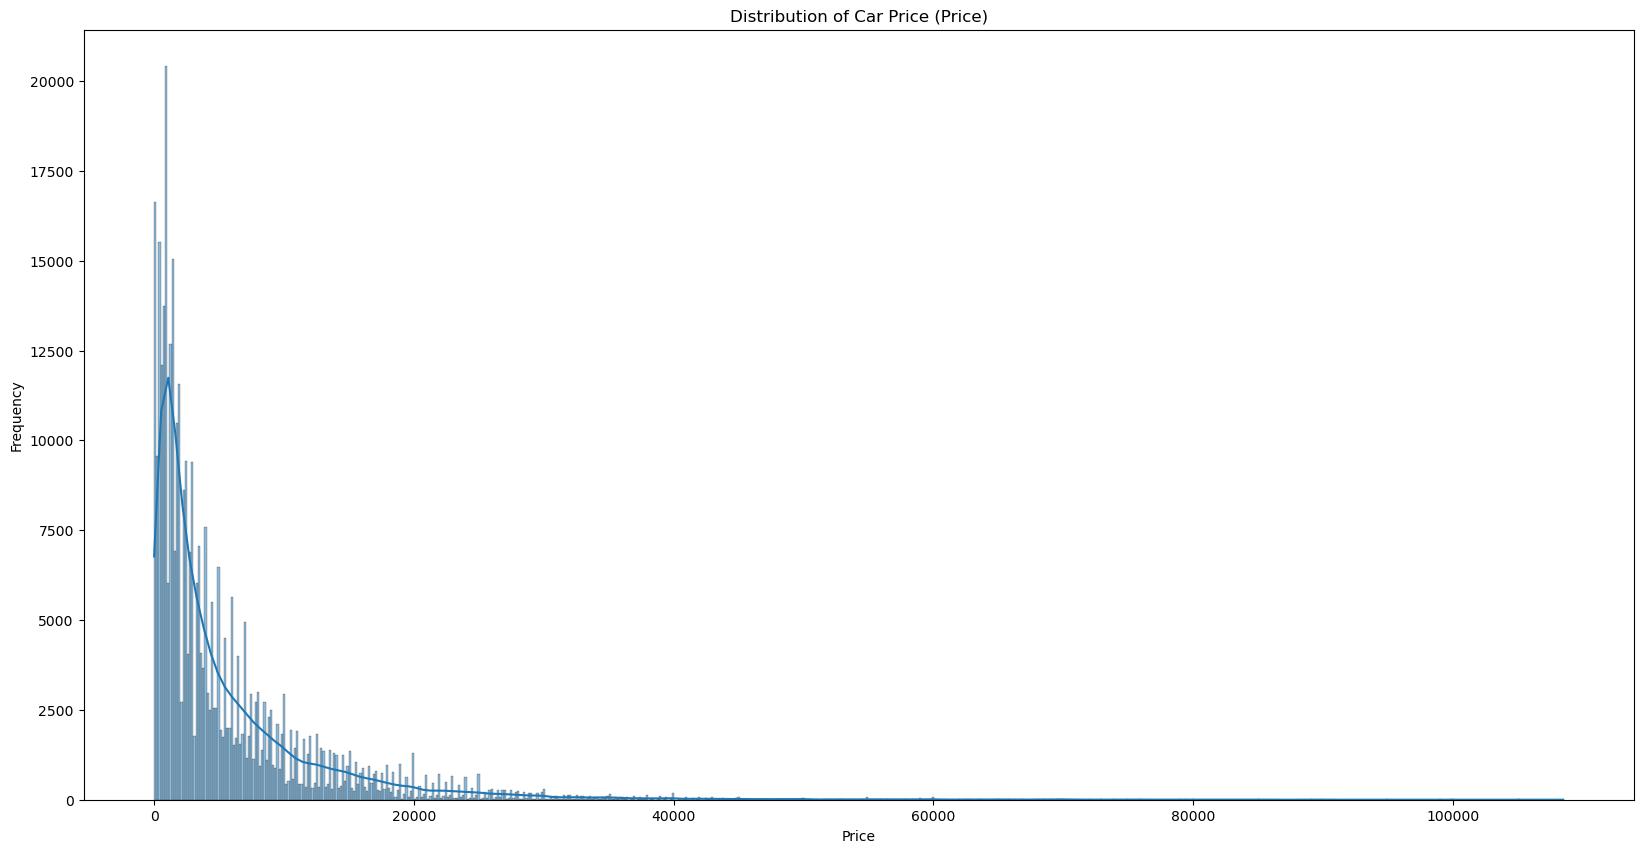

In [23]:
# distribution
# `price` has extreme values that make rendering the histogram impossible
# thus, we exclude them just for the chart
q_low, q_high = df['price'].quantile([0.001, 0.999])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df_trimmed['price'], kde=True)
ax.set_title("Distribution of Car Price (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

The target variable involves a large amount of outliers. Extreme outliers. This visual observation is confirmed by the following boxplot:

<Axes: ylabel='price'>

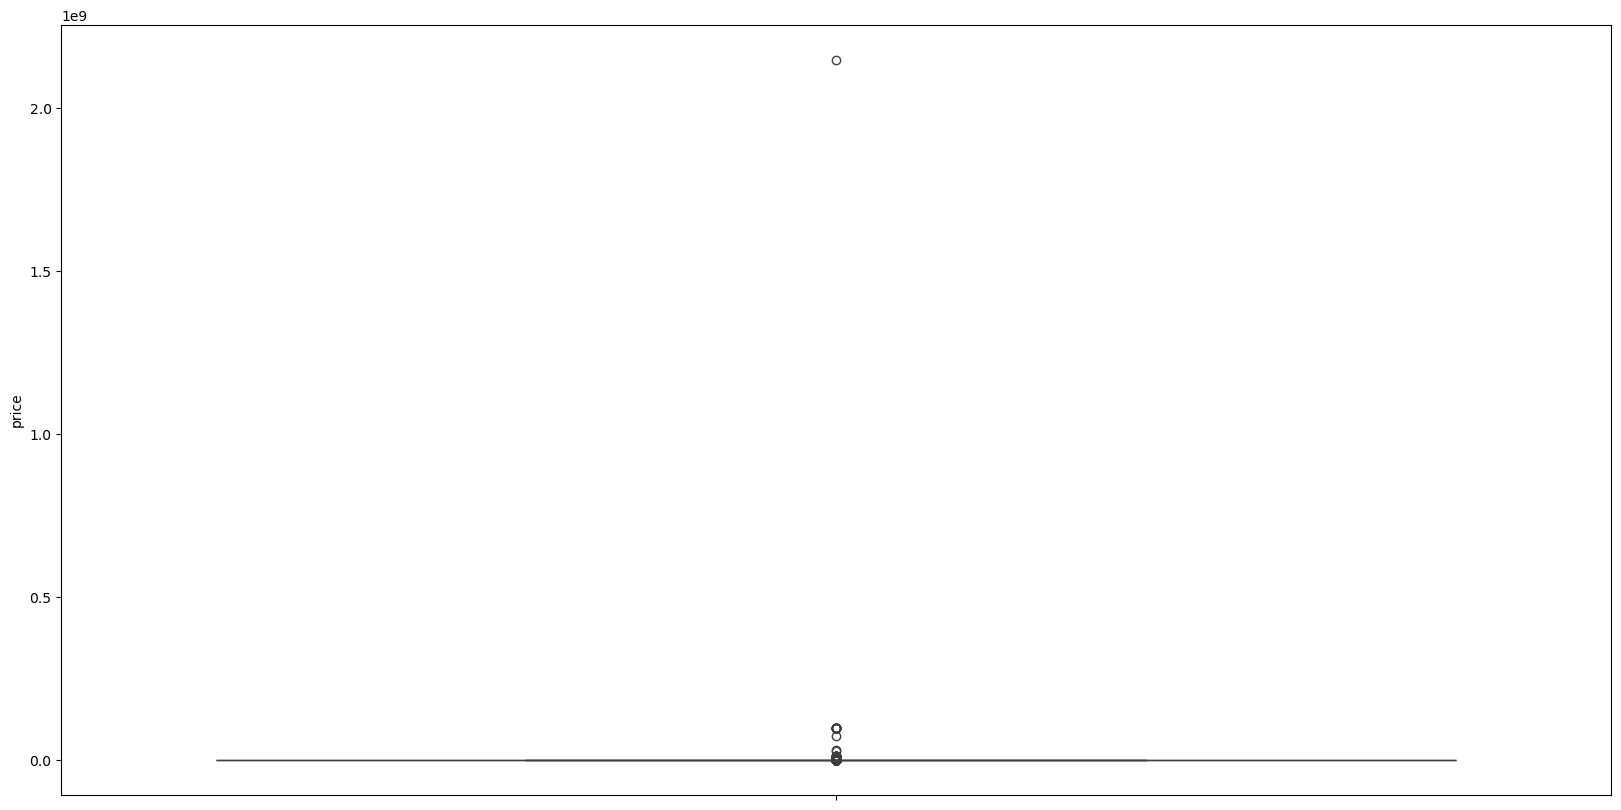

In [25]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, y='price')

<Axes: ylabel='price'>

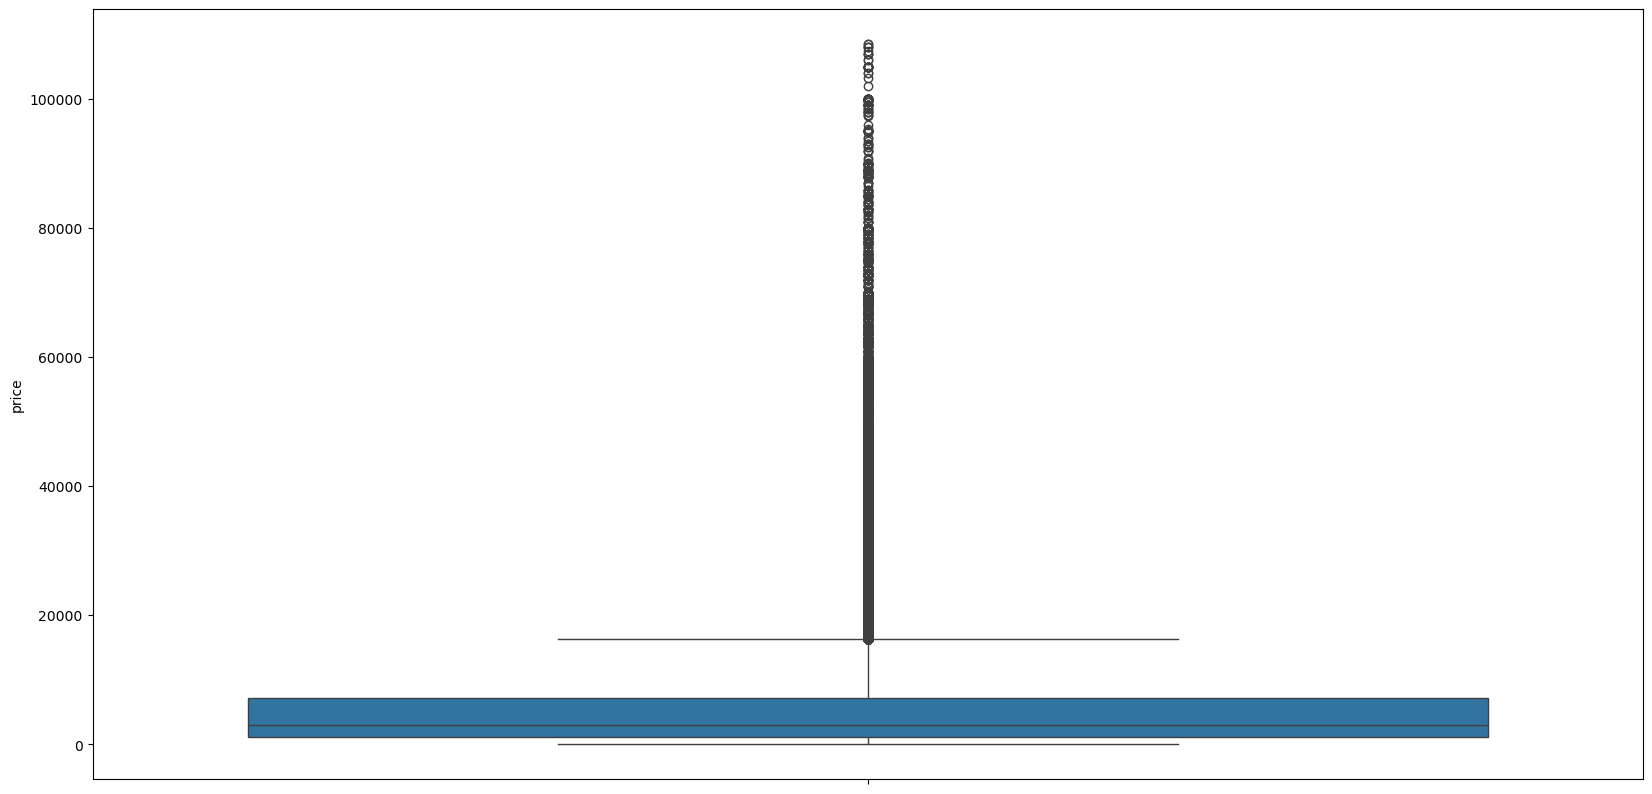

In [26]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')

<Axes: ylabel='price'>

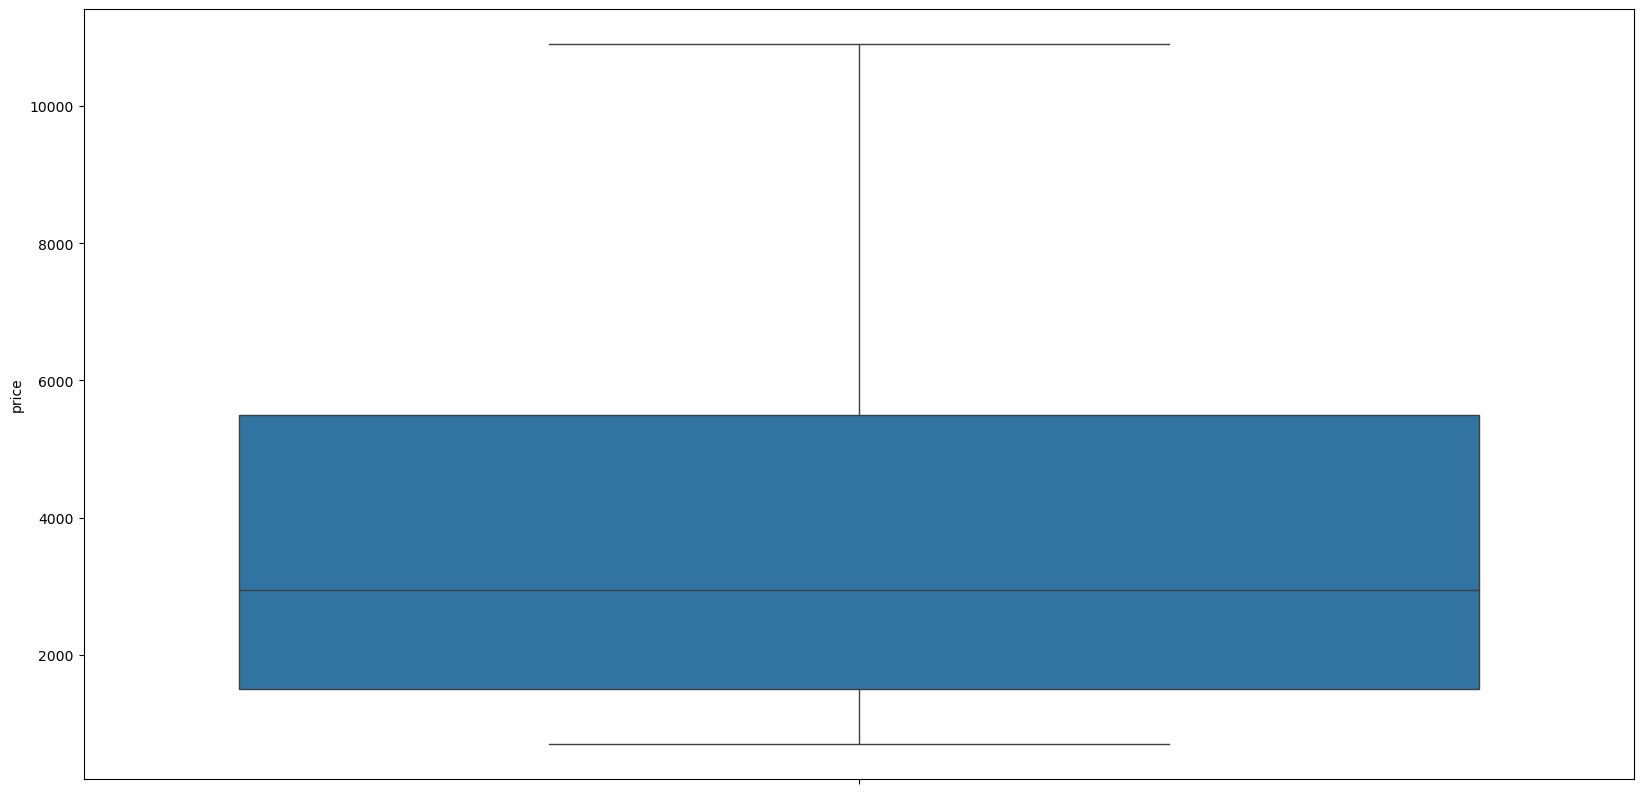

In [27]:
q_low, q_high = df['price'].quantile([0.15, 0.85])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')

The target variable can be said that it does not follow the normal distribution based on the output of the normality tests shown below. All of them are

In [29]:
def run_normality_tests(data):
    """
    Perform various normality tests (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov, D'Agostino and Pearson, Jarque-Bera, and Lilliefors) on a given dataset.
    Choosing the Right Test:
        * For small sample sizes (< 50), the Shapiro-Wilk Test is recommended.
        * For larger samples, use the D’Agostino and Pearson’s Test or Jarque-Bera Test.
        * If you need critical values, use the Anderson-Darling Test.
        * Use the Kolmogorov-Smirnov Test or Lilliefors Test for additional validation, especially when comparing with a reference distribution.
    
    All tests compute a p-value. The p-value (probability value) is a statistical measure that helps you determine whether the observed data is consistent with a 
    null hypothesis. In the context of normality tests, the null hypothesis is usually: "The data follows a normal distribution."
    
    How to Interpret the p-value:
        * High p-value (>= 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the data might follow a normal distribution.
        * Low p-value (< 0.05): The null hypothesis is rejected. This indicates that the data does not follow a normal distribution.
        
    In Practice
        * If a test returns a p-value of 0.03, it means there is a 3% probability that the data could have arisen under the assumption of a normal distribution. In this case, you would reject the null hypothesis (assuming a 5% significance threshold).
        * If a test returns a p-value of 0.2, it suggests there is no strong evidence against the data being normal.

    Caveats
        * A high p-value does not prove normality, it simply suggests that the data is not inconsistent with a normal distribution.
        * A low p-value indicates a deviation from normality but does not specify the nature of that deviation (e.g., skewness, kurtosis).

    Parameters:
        data (array-like): The dataset to test for normality.

    Returns:
        dict: A dictionary containing test results with the test name, statistic, p-value, and whether the data is considered normal at a 5% significance level.
    """
    results = {}

    # Shapiro-Wilk Test
    # this test is commented out since it provides unreliable results for N > 5000
    """
    try:
        stat, p = shapiro(data)
        results['Shapiro-Wilk Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Shapiro-Wilk Test'] = {'Error': str(e)}
    """

    # Anderson-Darling Test
    try:
        result = anderson(data, dist='norm')
        results['Anderson-Darling Test'] = {
            'Statistic': result.statistic,
            'Critical Values': result.critical_values,
            'Significance Levels': result.significance_level,
            'Normal': result.statistic < result.critical_values[2]  # At 5% level
        }
    except Exception as e:
        results['Anderson-Darling Test'] = {'Error': str(e)}

    # Kolmogorov-Smirnov Test
    try:
        standardized_data = (data - np.mean(data)) / np.std(data)
        stat, p = kstest(standardized_data, 'norm')
        results['Kolmogorov-Smirnov Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Kolmogorov-Smirnov Test'] = {'Error': str(e)}

    # D’Agostino and Pearson’s Test
    try:
        stat, p = normaltest(data)
        results['D’Agostino and Pearson’s Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['D’Agostino and Pearson’s Test'] = {'Error': str(e)}

    # Jarque-Bera Test
    try:
        stat, p = jarque_bera(data)
        results['Jarque-Bera Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Jarque-Bera Test'] = {'Error': str(e)}

    # Lilliefors Test
    try:
        stat, p = lilliefors(data)
        results['Lilliefors Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Lilliefors Test'] = {'Error': str(e)}

    return results

In [30]:
results = run_normality_tests(df['price'])
for test, result in results.items():
    print(f"{test}: {result}")

Anderson-Darling Test: {'Statistic': 142863.78784574172, 'Critical Values': array([0.576, 0.656, 0.787, 0.918, 1.092]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Normal': False}
Kolmogorov-Smirnov Test: {'Statistic': 0.49807694595155544, 'p-value': 0.0, 'Normal': False}
D’Agostino and Pearson’s Test: {'Statistic': 2413270.2645356734, 'p-value': 0.0, 'Normal': False}
Jarque-Bera Test: {'Statistic': 1846925273351852.8, 'p-value': 0.0, 'Normal': False}
Lilliefors Test: {'Statistic': 0.4980769485396755, 'p-value': 0.0009999999999998899, 'Normal': False}


From the aforementioned resuts, **price deviates from normality**.

From the histogram and the kernel density estimate (KDE) curve shown above, we can say that the distribution appears to be very asymmetric around its left peak, which is approximately 0-2000. There is an extreme tail elongation on the right side. Since the distribution is approximately asymmetric, it suggests that the skewness value would be large. However, the exact skewness value would need to be calculated. Below, we are using the .skew() function to reveal if the target variable is skewed:

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and -0.5 or between 0.5 and 1, the data are moderately left-skewed or right-skewed respectively
* If the skewness is less than -1 or greater than 1, the data are highly left-skewed or right-skewed respectively

In [33]:
print('skewness:', df['price'].skew())

skewness: 578.0474145827042


As show above, the **target variable is extremely right-skewed**, therefore unskewing techniques such as Log, Sqrt, Box-Cox and Yeo-Johnson can be applied. Since `price` consists only of positive values, we can use every technique mentioned.

### Predicting values more than 200,000 and below 1,000 is not useful.
### In order to make our model effectively predict prices 1,000 - 200,000 we will exclude all rows with prices outside this range. 

In [36]:
print(df.shape)
df = df.drop(df[(df['price'] < 1000) | (df['price'] > 200_000)].index, axis='index')
print(df.shape)

(371513, 18)
(288017, 18)


In [37]:
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,288017.000000,288017.000000,288017.000000,288017.000000,288017.000000,288017.000000,288017.000000
mean,185822.266804,7190.014364,2005.126315,127.638504,122733.866404,6.024148,51650.045171
std,107308.453298,8769.154698,63.813781,194.191270,40790.242233,3.591257,25701.406282
min,1.000000,1000.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,92839.000000,2200.000000,2001.000000,80.000000,100000.000000,3.000000,31226.000000
50%,185862.000000,4350.000000,2005.000000,116.000000,150000.000000,6.000000,50769.000000
75%,278859.000000,8950.000000,2009.000000,160.000000,150000.000000,9.000000,72469.000000
max,371527.000000,200000.000000,9999.000000,20000.000000,150000.000000,12.000000,99998.000000


Text(0, 0.5, 'Frequency')

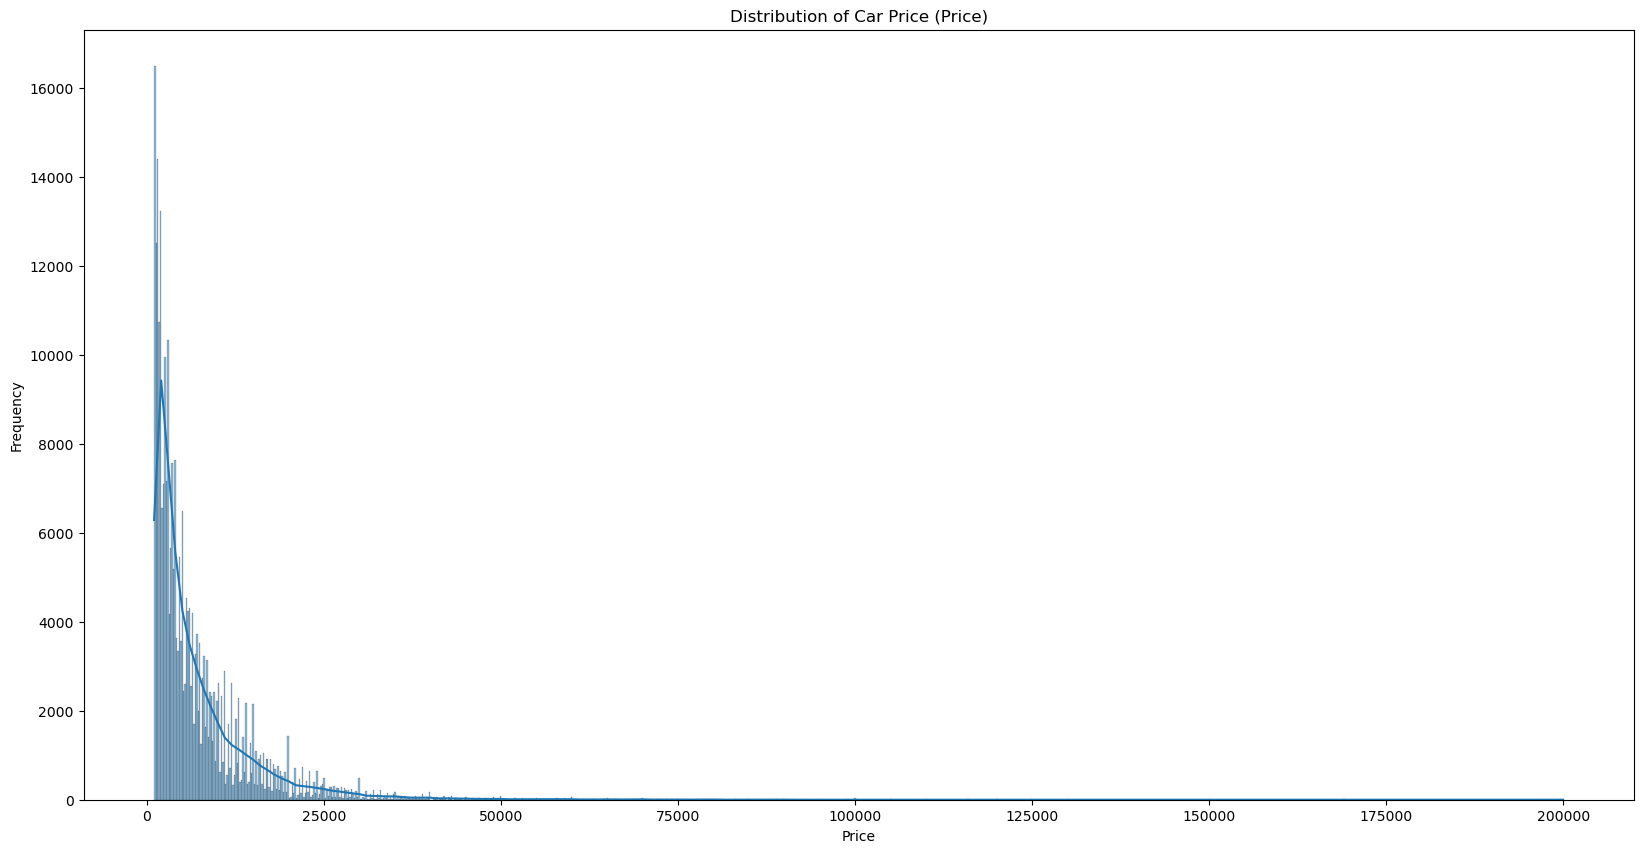

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df['price'], kde=True)
ax.set_title("Distribution of Car Price (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

<Axes: ylabel='price'>

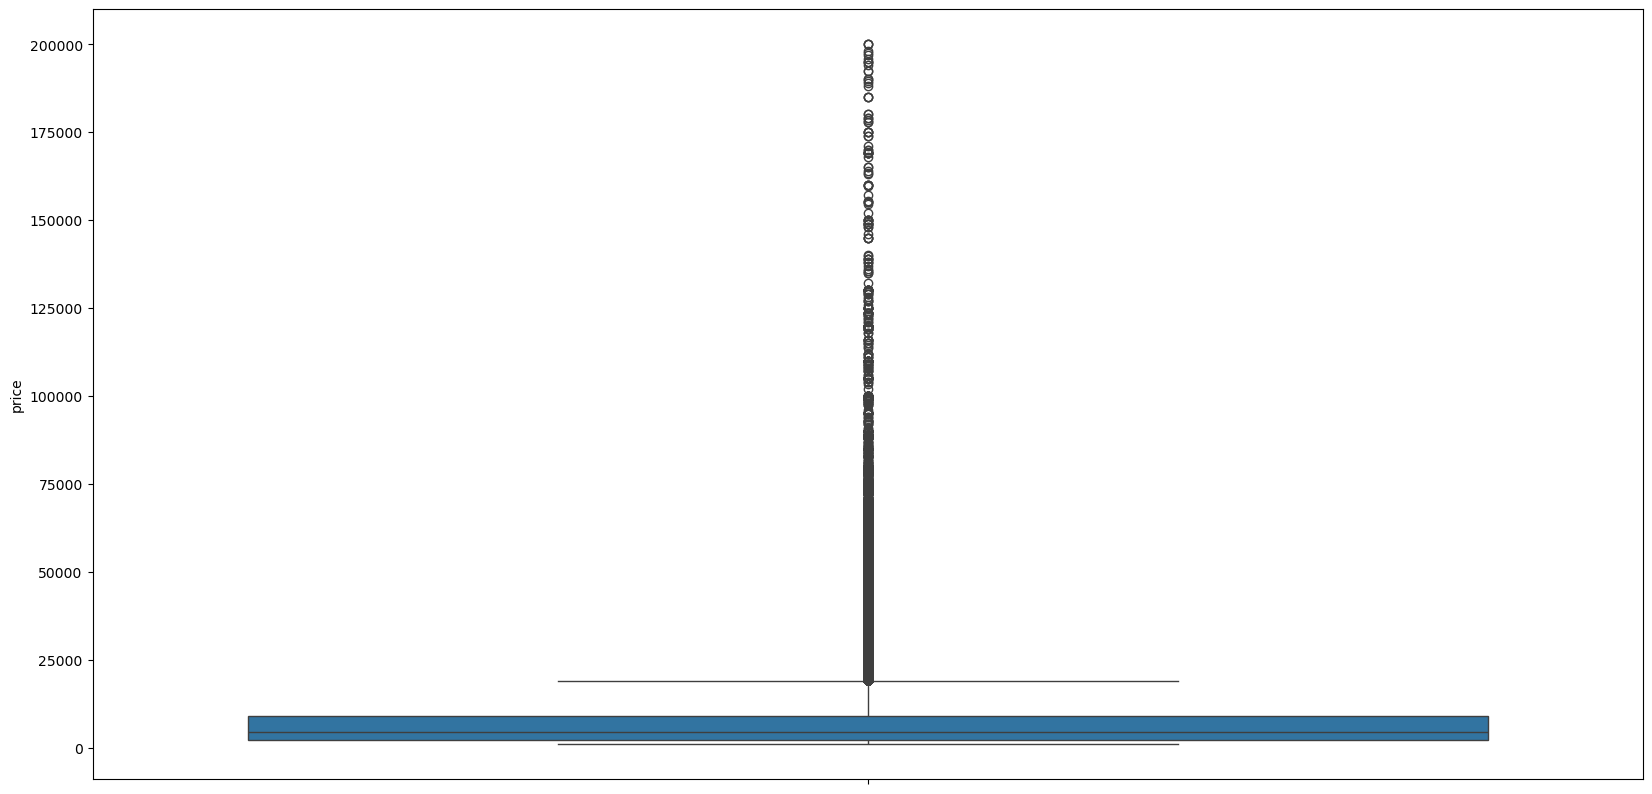

In [39]:
# boxplot
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, y='price')

<Axes: ylabel='price'>

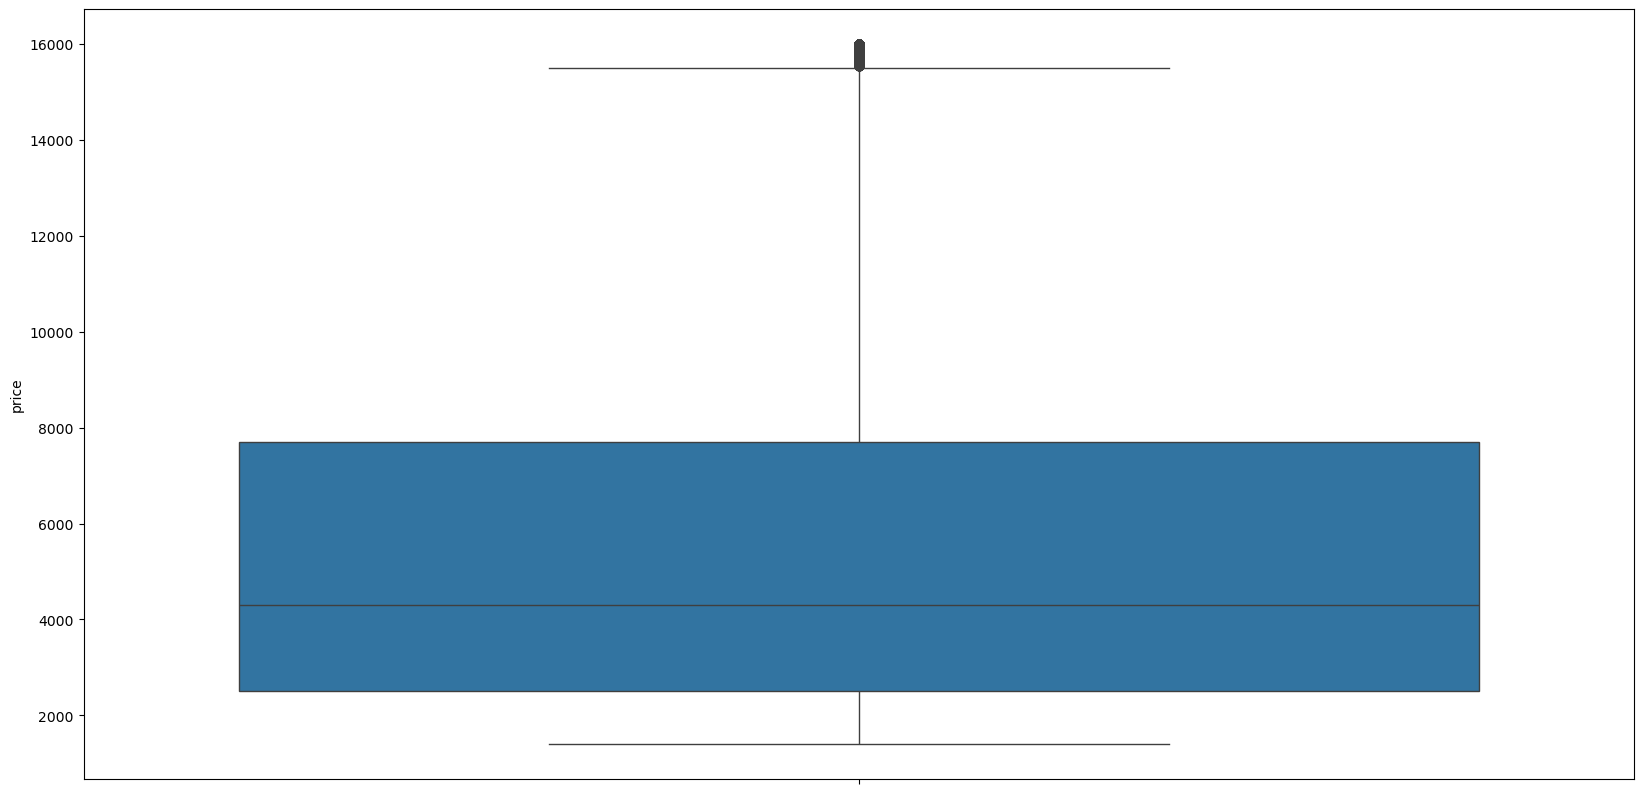

In [40]:
q_low, q_high = df['price'].quantile([0.1, 0.9])
df_trimmed = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df_trimmed, y='price')

Dominant bin is low, meaning our model will perform better on cars with lower prices, also decent on average prices. Since we have very few high instances, our model will sruggle for such prices

## Categorical Features Analysis

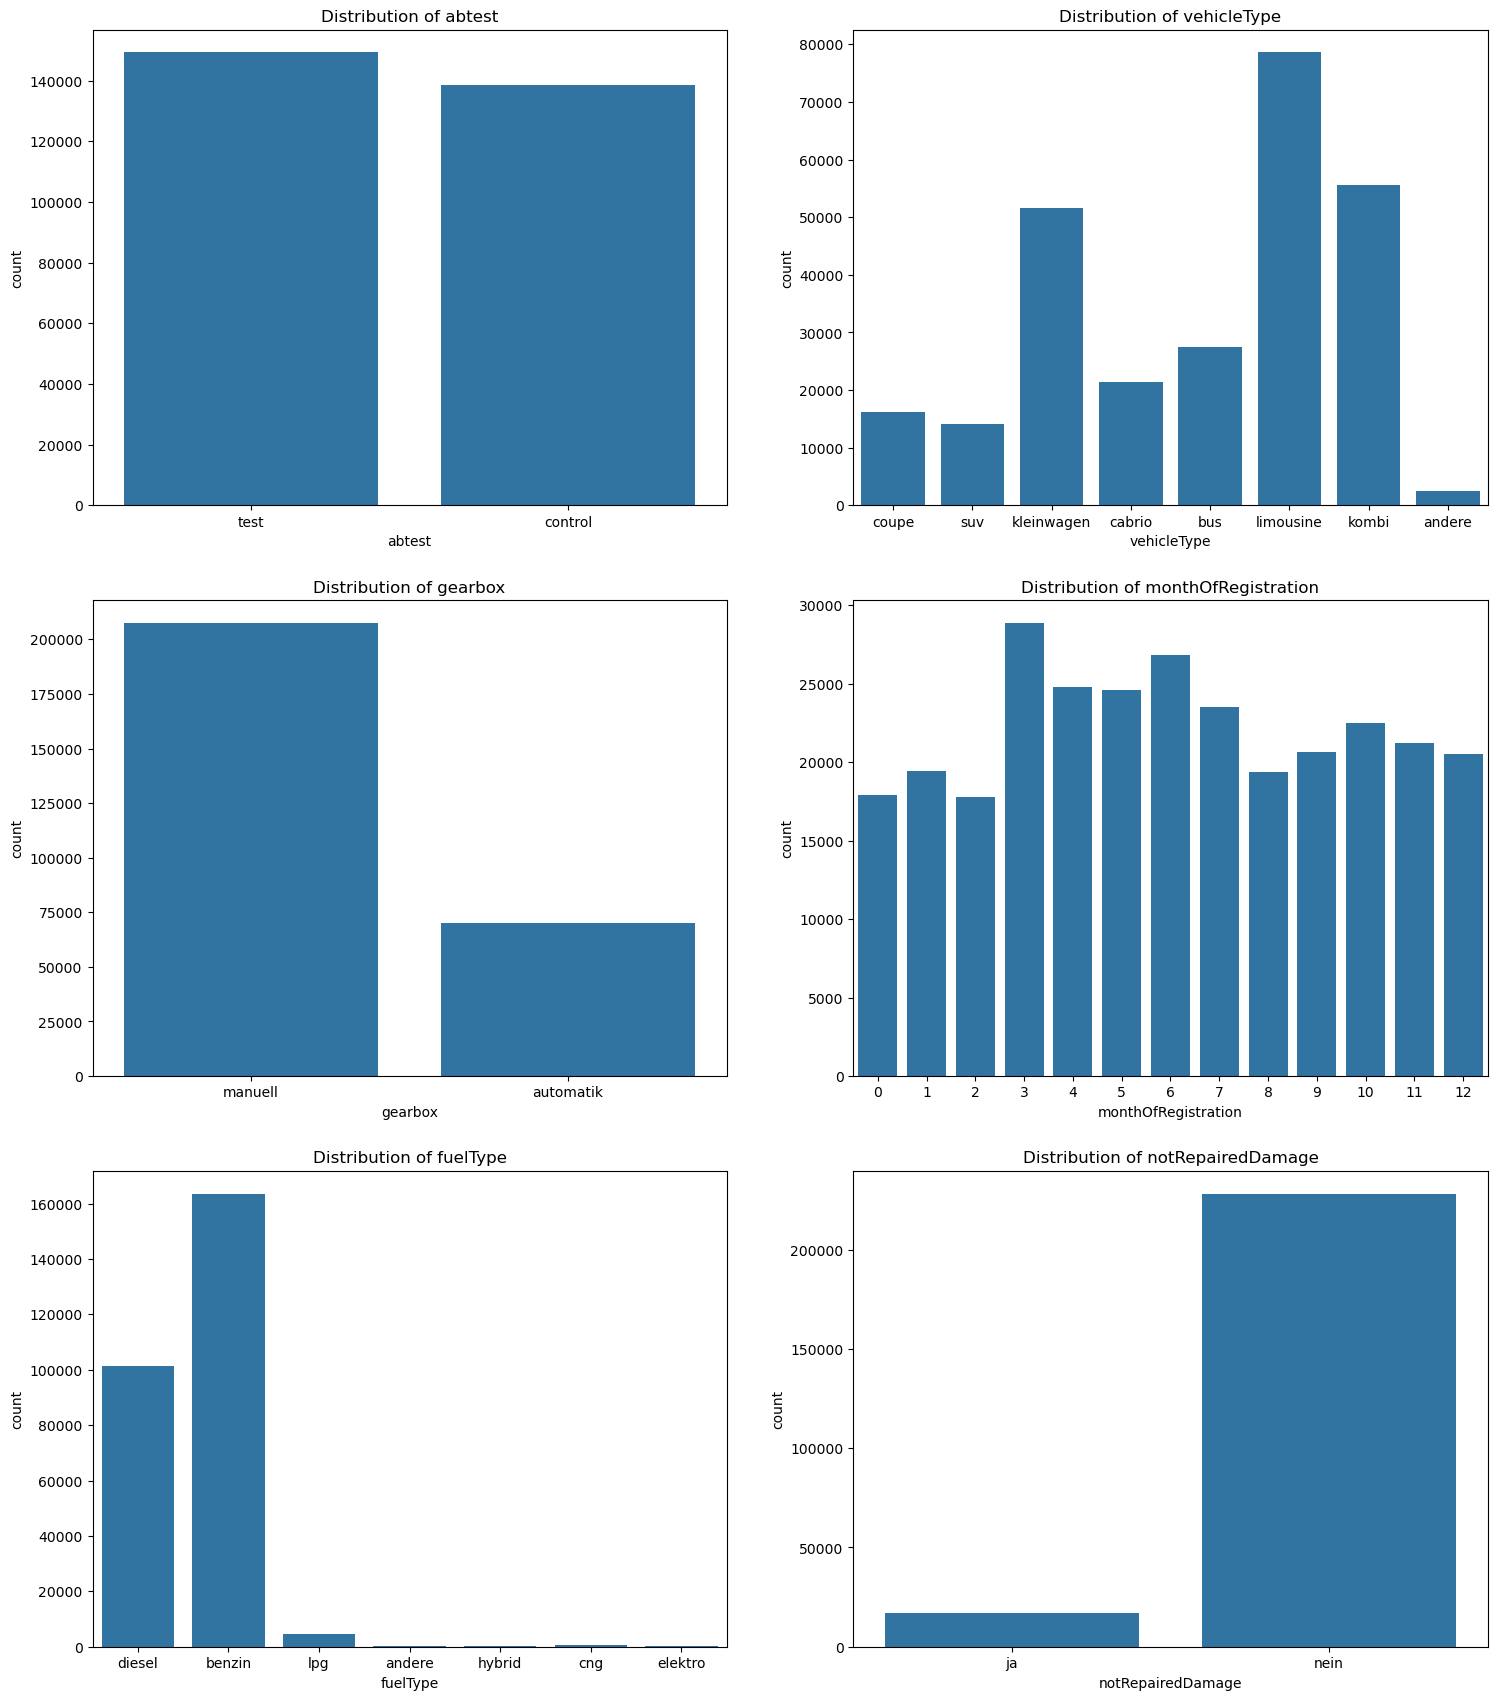

In [43]:
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage']
nrows, ncols = 3, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i,j = 0,0
for feature in categorical_features:
    sns.countplot(x=feature, data=df, ax=axs[i,j])
    axs[i,j].set_title(f"Distribution of {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0

The bar plots shown above depict the distributions of several categorical variables in the dataset. Here are observations and insights for each feature:

1. ABtest (abtest)
   * both values (test and control) have similar distributions, while test appears more often
   * this variable can be useful for understanding the role of ABtest on price
2. Vehicle type (vehicleType)
   * three of the vehicle types dominate the distribution (kleinwagen, limousine, kombi)
   * the rest appear often enough to matter
   * andere appears too few times, perhaps oversampling could be used
3. gearbox (gearbox)
   * the majority of gearbox values are manual (manuell), though a signifigant portion is automatic (automatik)
   * the value of gearbox could help play a major role in determining the value of price
4. month of registration (monthOfRegistration)
   * each month has more or less similar amount of car registrations
   * months have 13th value, maybe 0 value is for null/NaN (dataset documentation does not specify)
5. fuel type (fuelType)
   * benzin appears, by far, the most often
   * desel appears often enough to impact learning
   * the rest of the values (lpg, andere, hybrid, cng, elektro) are extremely rare, perhaps we should join all these values into an `other` category
6. not repaired damage (notRepairedDamage)
   * nein dominates as a value
   * ja does appear, though maybe not enough
   * this could impact training

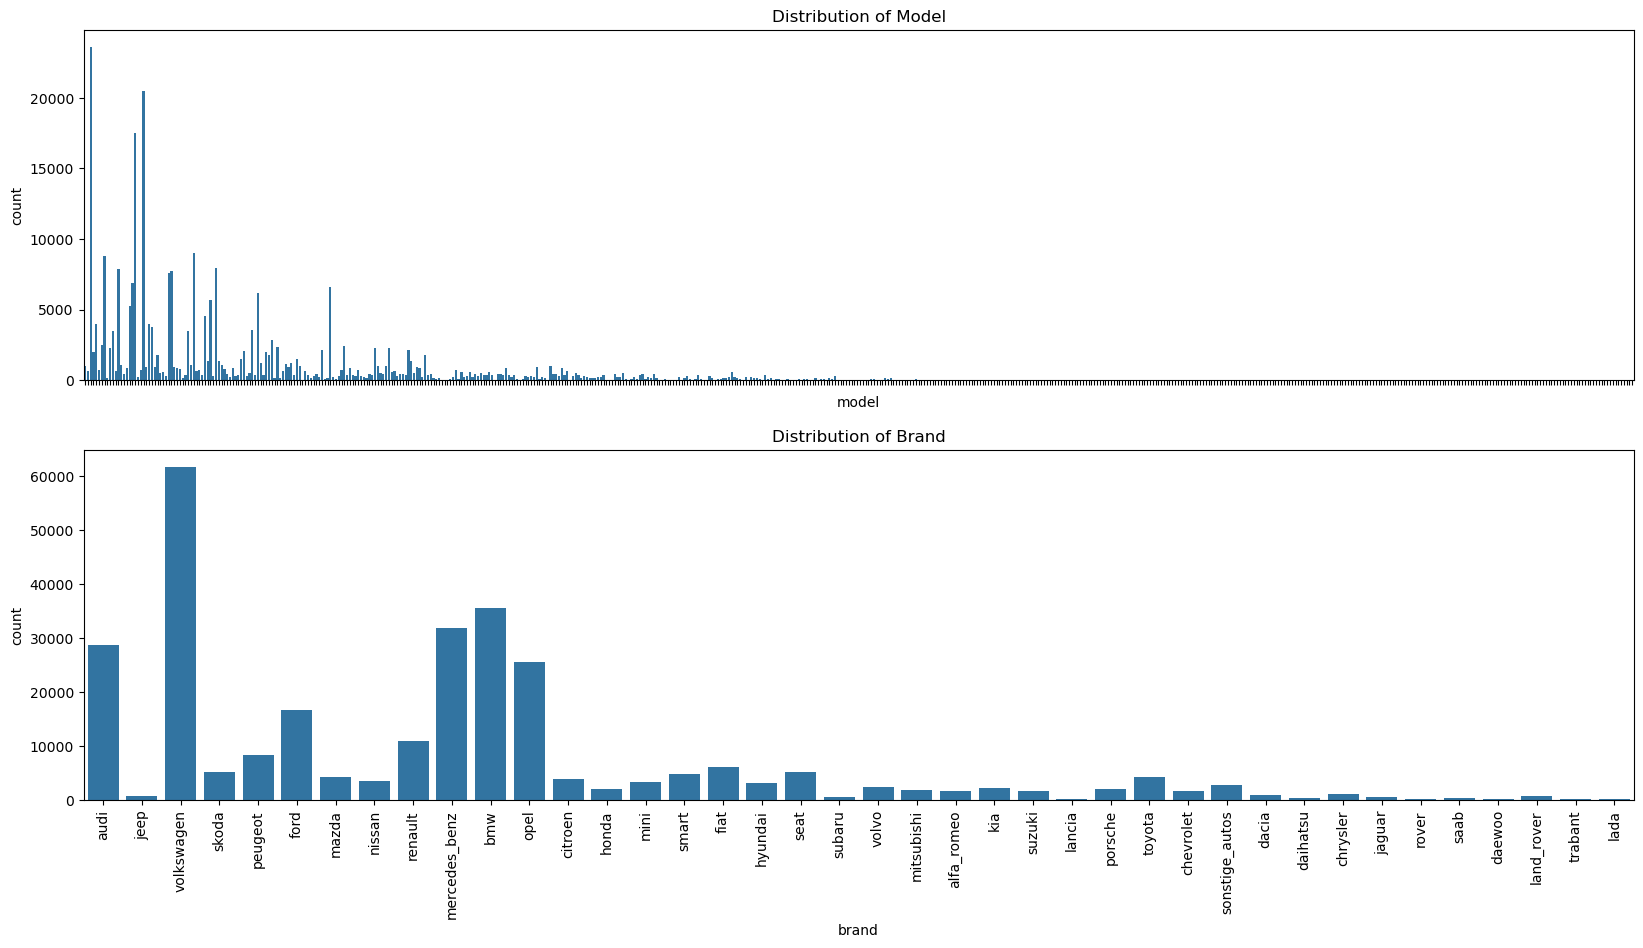

In [45]:
# model brand
nrows, ncols = 2, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Plot model distribution
sns.countplot(x='model', data=df, ax=axs[0])
axs[0].set_title("Distribution of Model")
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_xticklabels([])

sns.countplot(x='brand', data=df, ax=axs[1])
axs[1].set_title("Distribution of Brand")
axs[1].tick_params(axis='x', rotation=90)

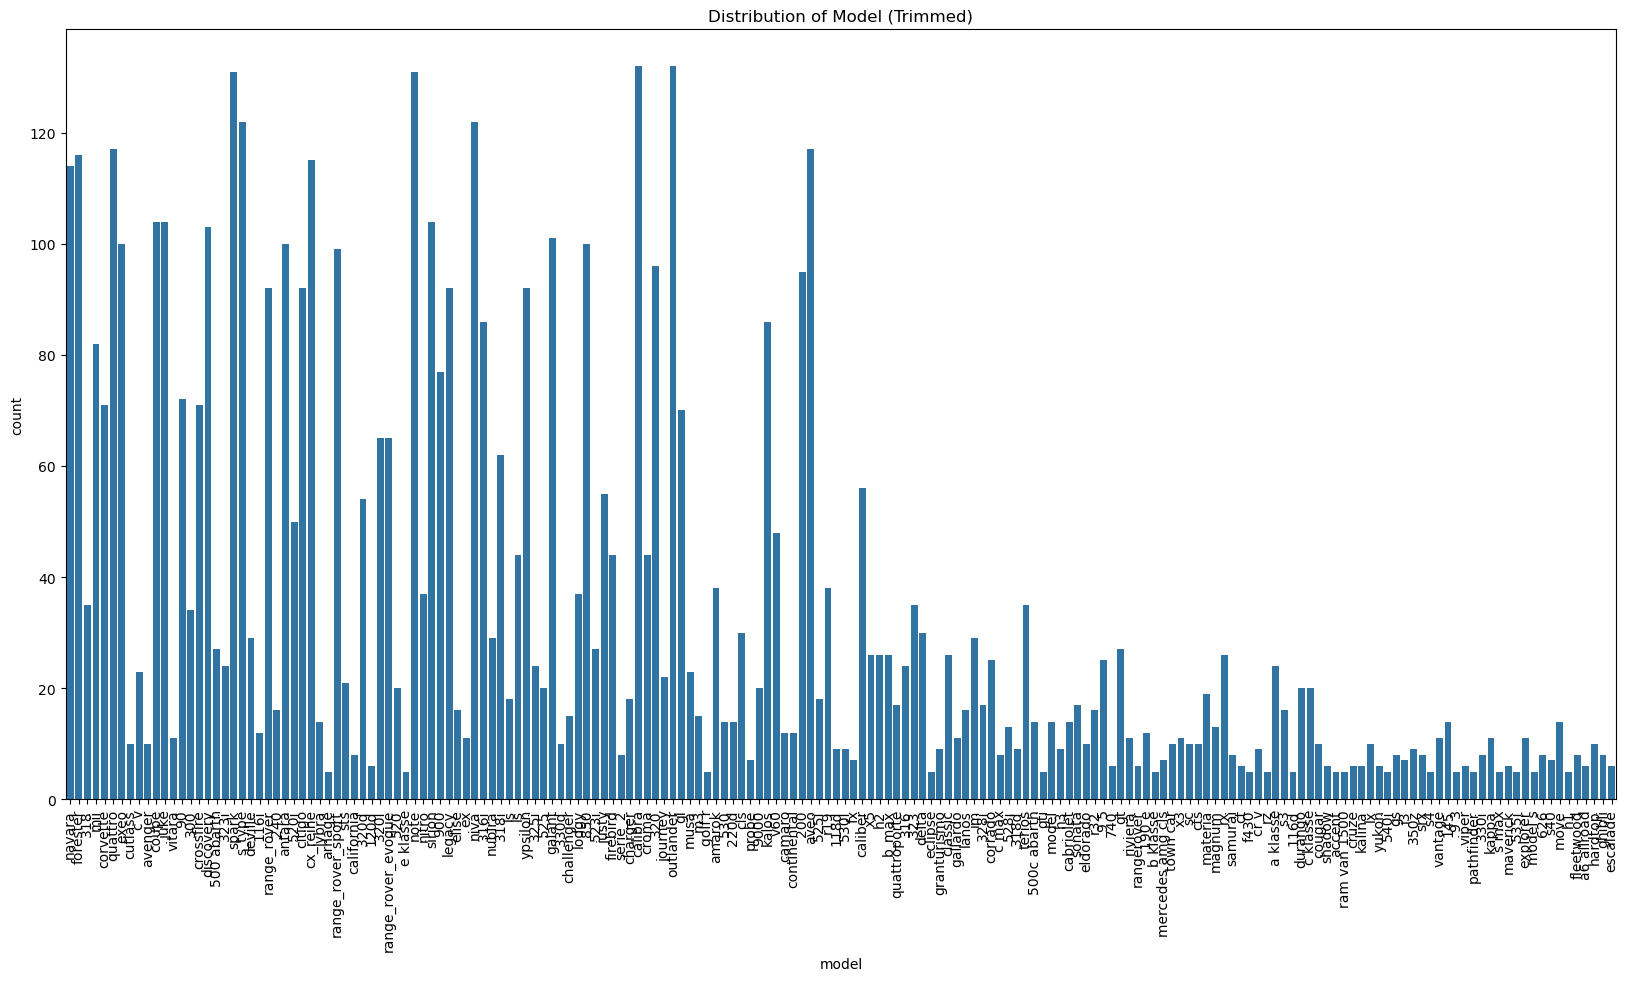

In [46]:

# Count how many times each model appears
model_counts = df['model'].value_counts()

# Determine quantile thresholds
q_low, q_high = model_counts.quantile([0.35, 0.65])

# Keep models within those frequency bounds
valid_models = model_counts[(model_counts >= q_low) & (model_counts <= q_high)].index

# Filter the DataFrame
df_trimmed = df[df['model'].isin(valid_models)]

# Plotting
nrows = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Model plot
sns.countplot(x='model', data=df_trimmed)
axs.set_title("Distribution of Model (Trimmed)")
axs.tick_params(axis='x', rotation=90)


# TODO: What about NAME?

# TODO: how should we handle model, name, barnd?

#### General observations:
* Features like vehicleType, gearbox, fuelType and notRepairedDamage have unbalanced distributions, we should consider using stratified sampling during data splitting for more fair comparisons
* Use grouped bar plots to better visualize the relationship between categorical features (since we cannot apply heatmap method)
* Search for correlation between features and target by comparing distributions with the 'cetegorical' version of out target (via binning method)

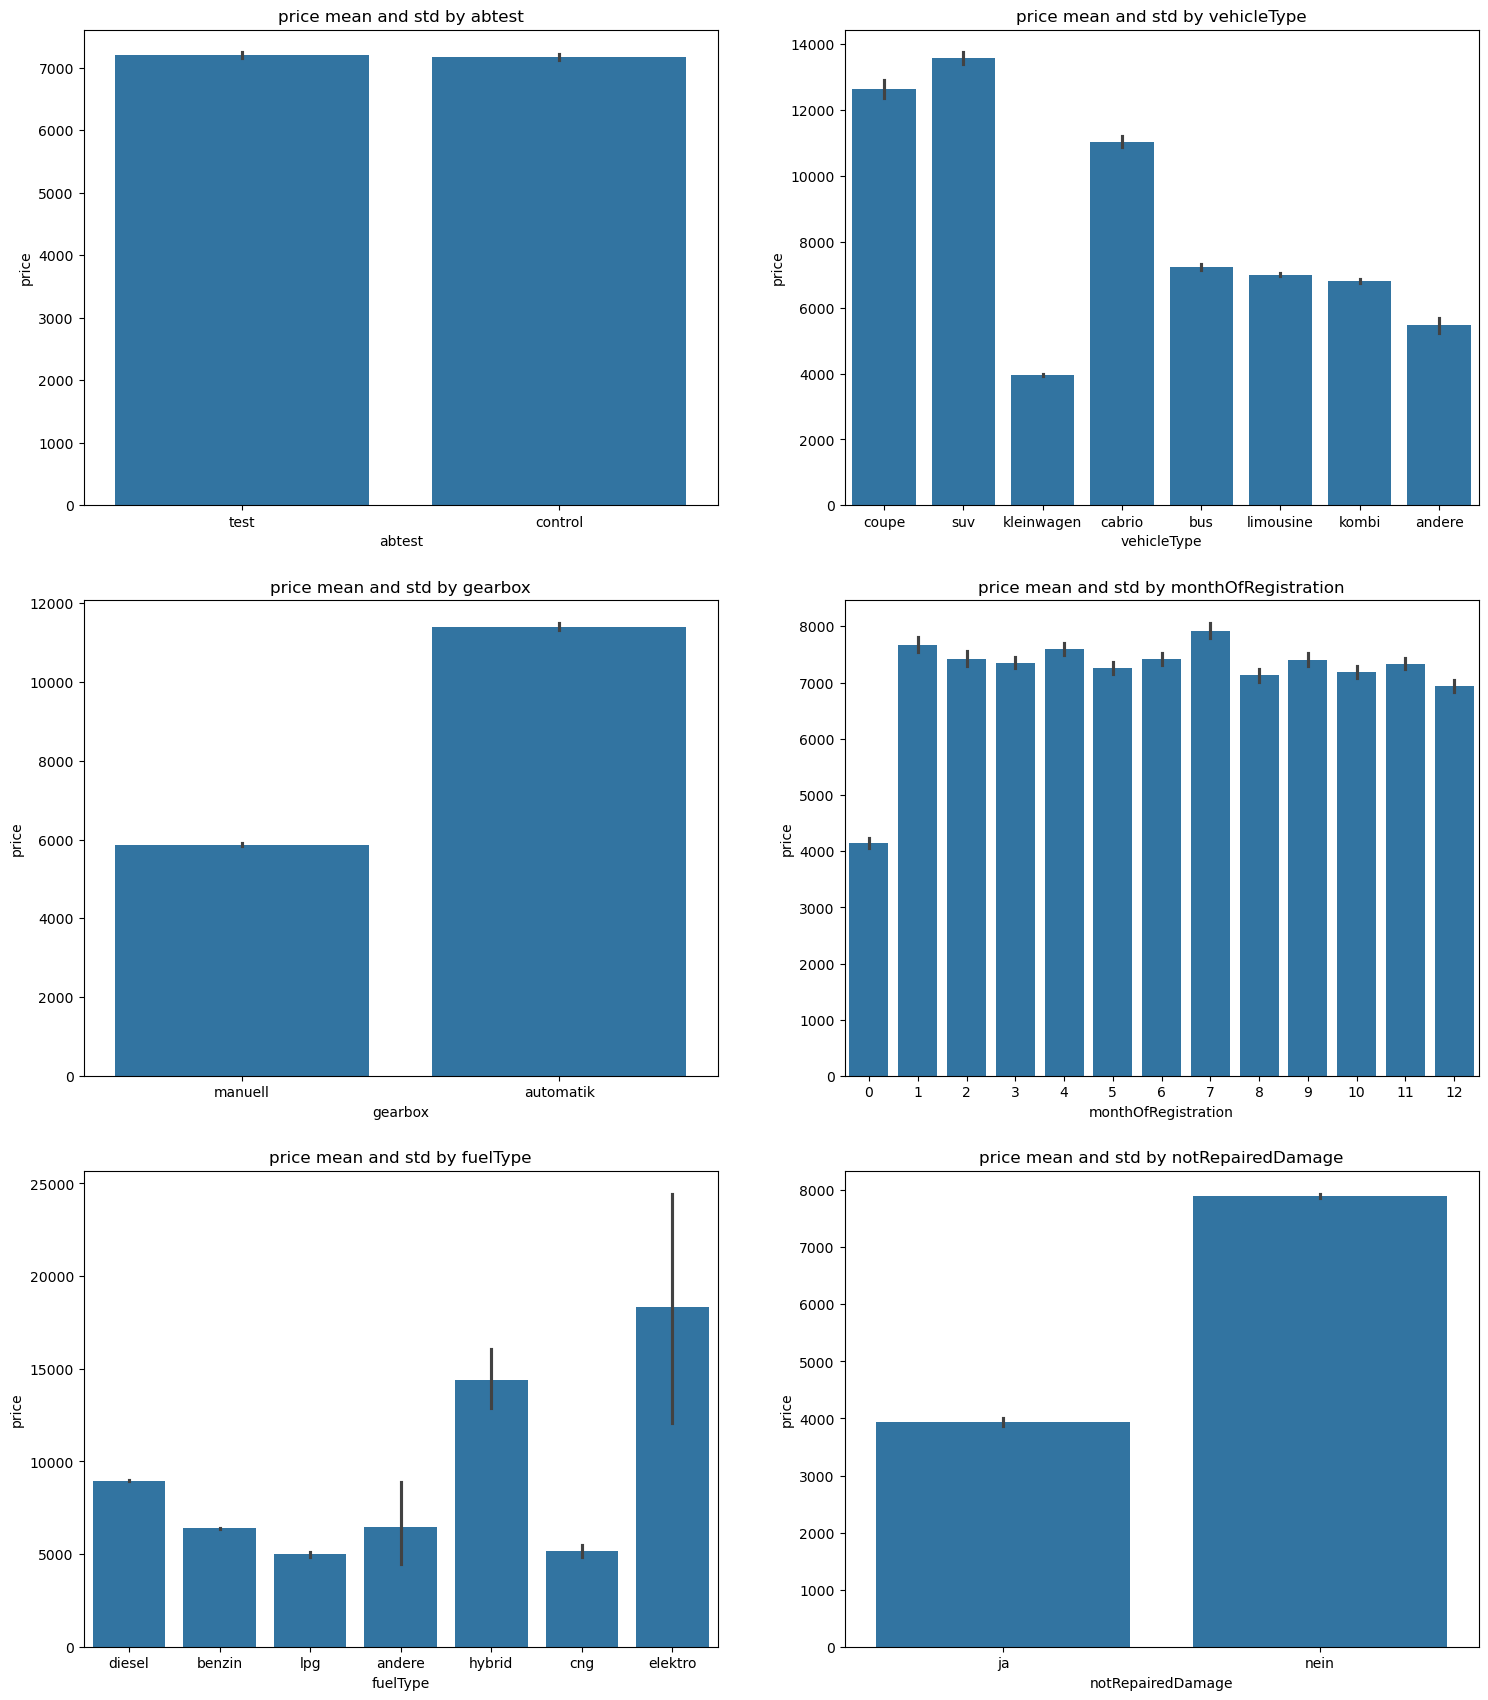

In [50]:
# Barplots: Visualize statistical measures (mean, std, median) of price for each category of a categorical variable.
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage']
nrows, ncols = 3, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i,j = 0,0
for feature in categorical_features:
    sns.barplot(y='price', x=feature, data=df, ax=axs[i,j])
    axs[i,j].set_title(f"price mean and std by {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0

1. abtest (abtest)
   * either category of abtest seems to have no influence over the price, since the mean depending on each category is the same of that of price.
   * meaning, this feature has no correlation with the target
   * perhaps we should remove this feature as it may have no influence on the target
2. type of vehicle (vehicleType)
   * each category plays a role in the value of price with rather small deviation
   * we can assume a large correlation between vehicle type and price
3. gearbox (gearbox)
   * the category of gearbox matters significantly to the price value
   * very high correlation with target
4. month of registration (monthOfRegistration)
   * all months except '0' have similar mean price. We need to investigate further into why '0' has different mean... 
5. type of fuel (fuelType)
   * very clearly the type of fuel has high correlation, since price values vary a lot by type.
   * we cannot condense hybrid and elektro into 'other' category, since the value of price changes significantly for those values.
   * is hybrid and elektro a value we wish to keep? maybe we should discard them alltogether 
   * lpg andere and cng could be condensed into 'other'
6. not repaired damge (notRepairedDamage)
   * this is another feature with high correlation since there's a huge difference in value depending on the category
  
#### General observations:
* all of the correlations found make a lot of sense
* except for month...

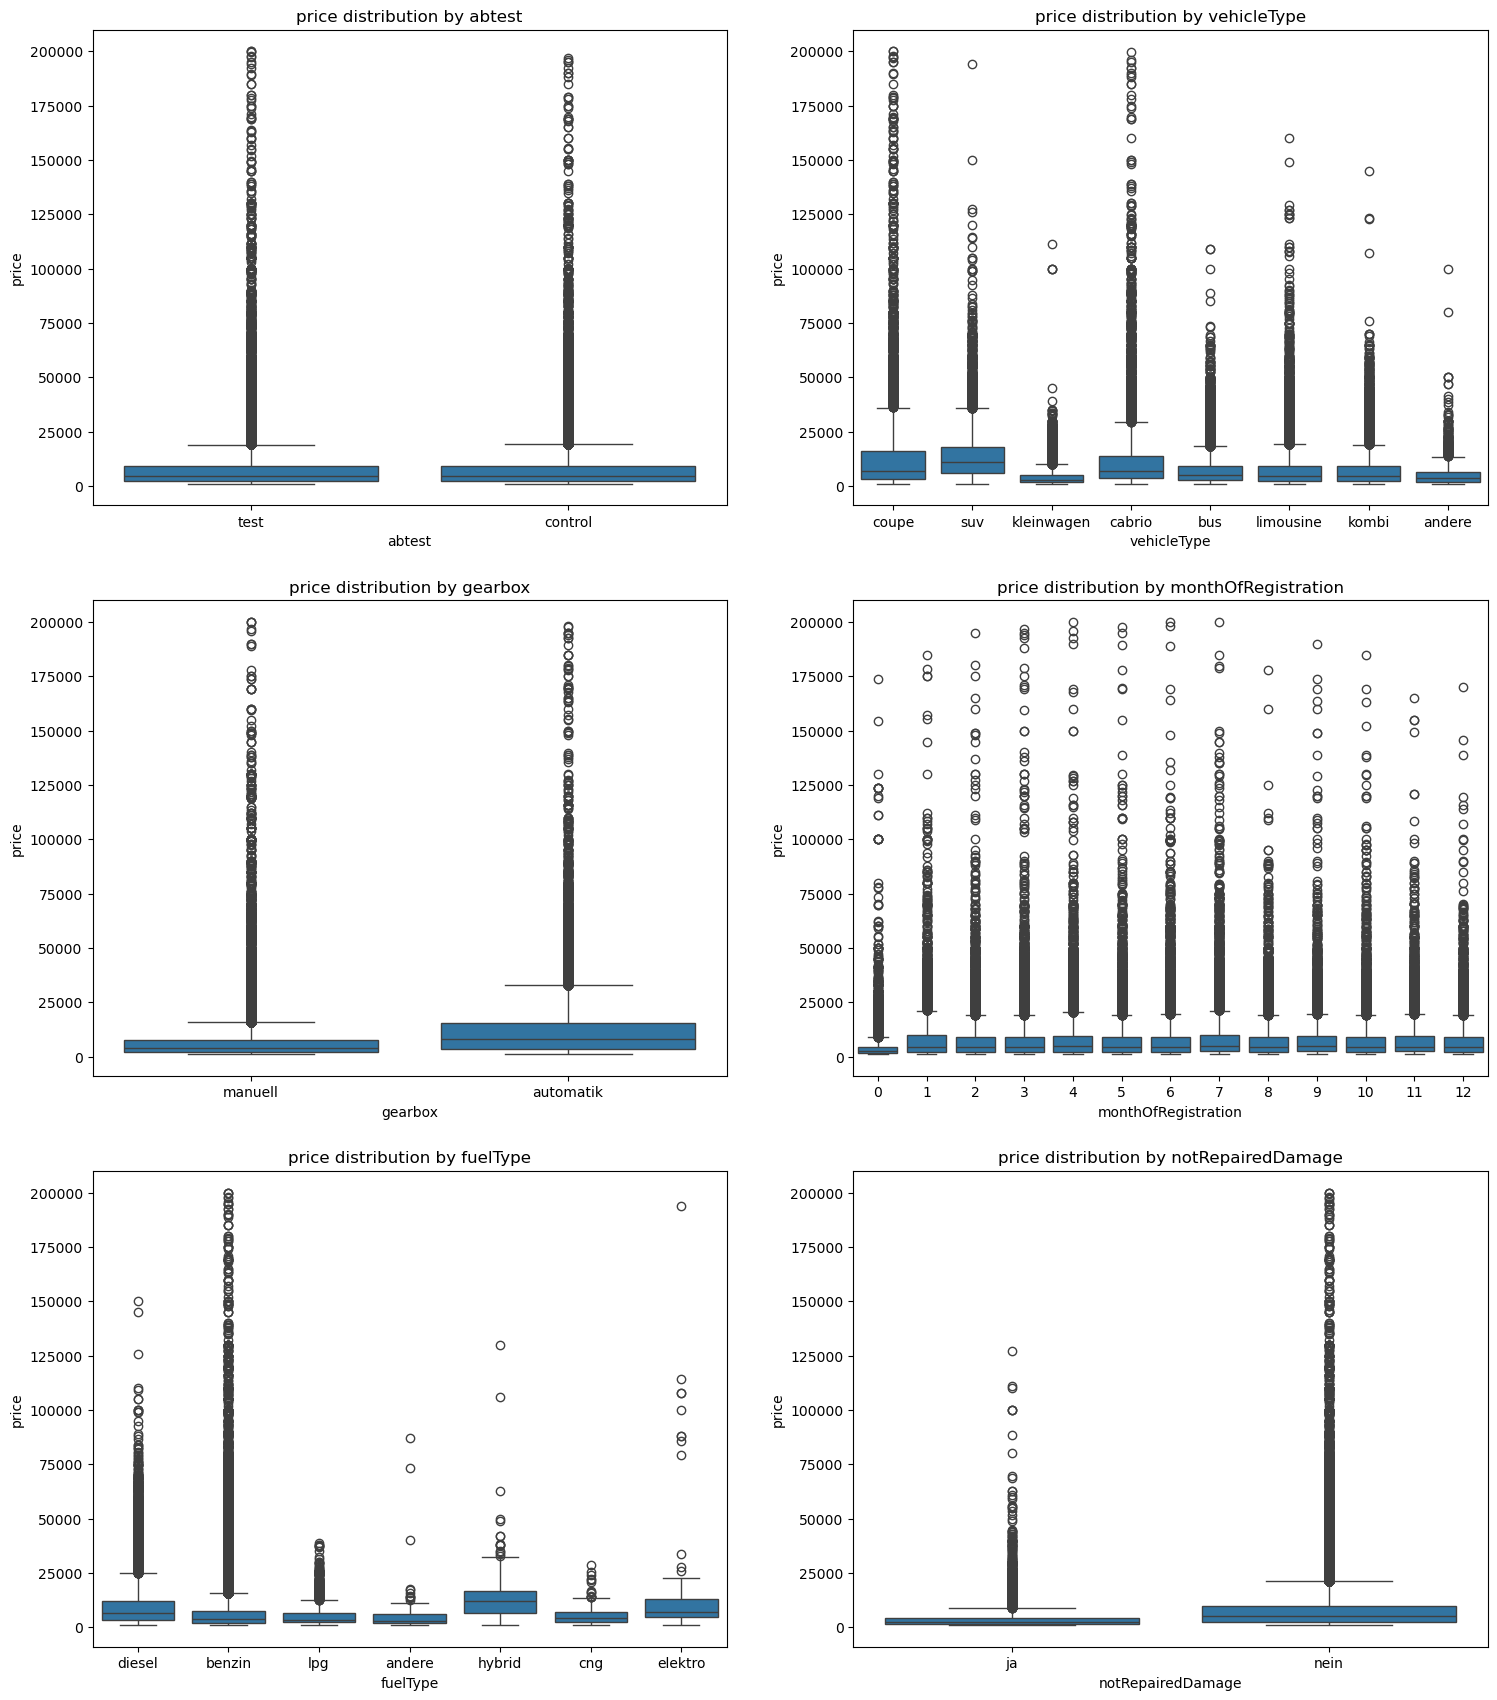

In [52]:
# Barplots: Visualize statistical measures (mean, std, median) of price for each category of a categorical variable.
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage']
nrows, ncols = 3, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i,j = 0,0
for feature in categorical_features:
    sns.boxplot(y='price', x=feature, data=df, ax=axs[i,j])
    axs[i,j].set_title(f"price distribution by {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0

* From the above boxplots, we observe similar behaviours as the barplots. 
* We should note, that every category value has a large amount of outliers

# We do the same for brand and model:

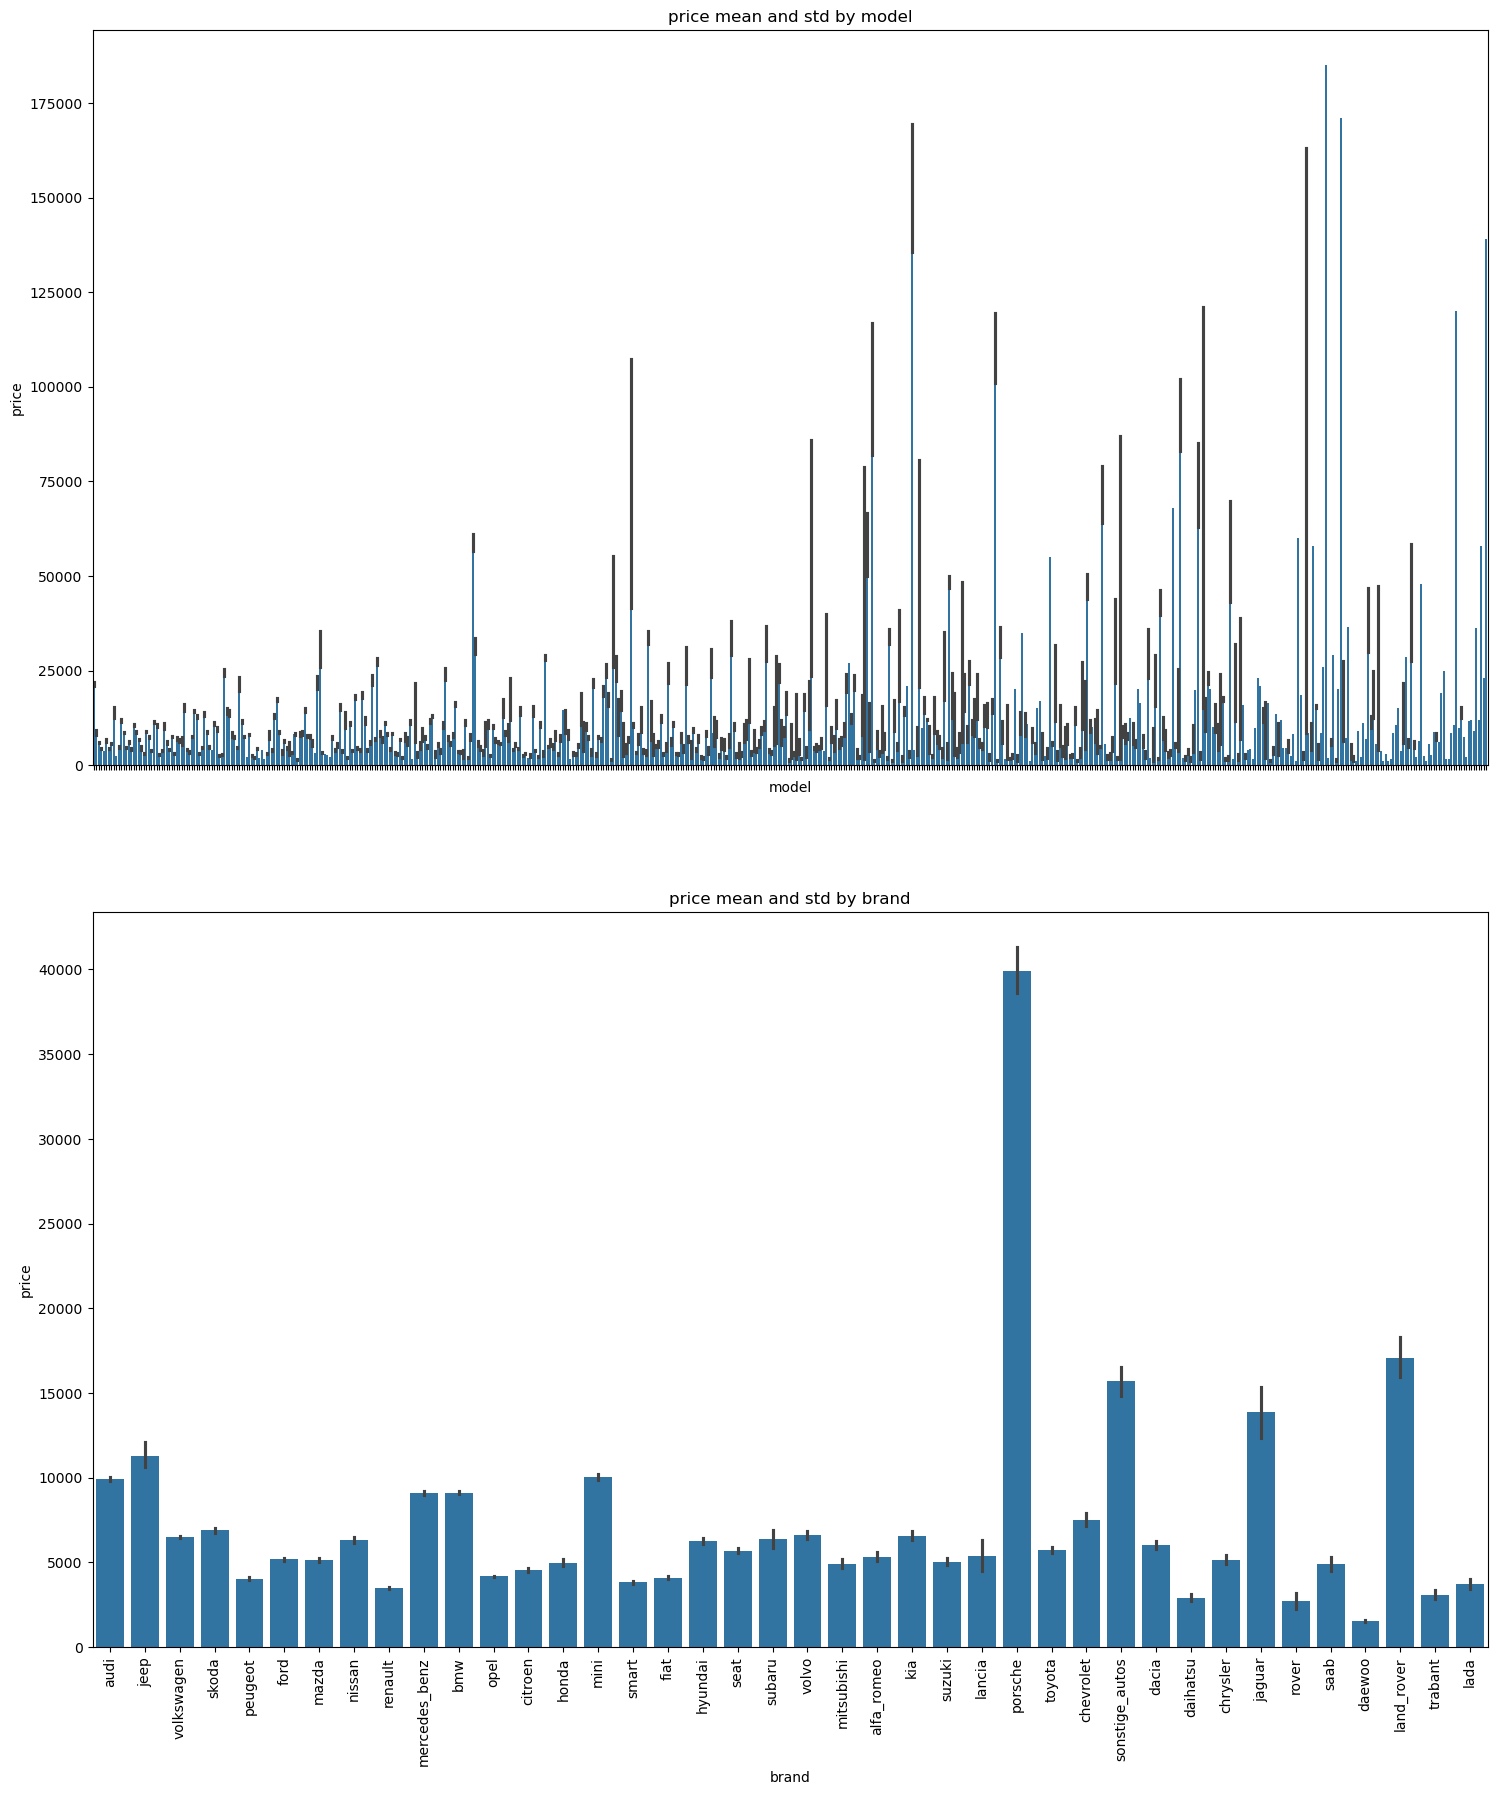

In [55]:
# model brand
nrows, ncols = 2, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))

# Plot model distribution
sns.barplot(y='price', x='model', data=df, ax=axs[0])
axs[0].set_title("price mean and std by model")
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_xticklabels([])

sns.barplot(y='price', x='brand', data=df, ax=axs[1])
axs[1].set_title("price mean and std by brand")
axs[1].tick_params(axis='x', rotation=90)

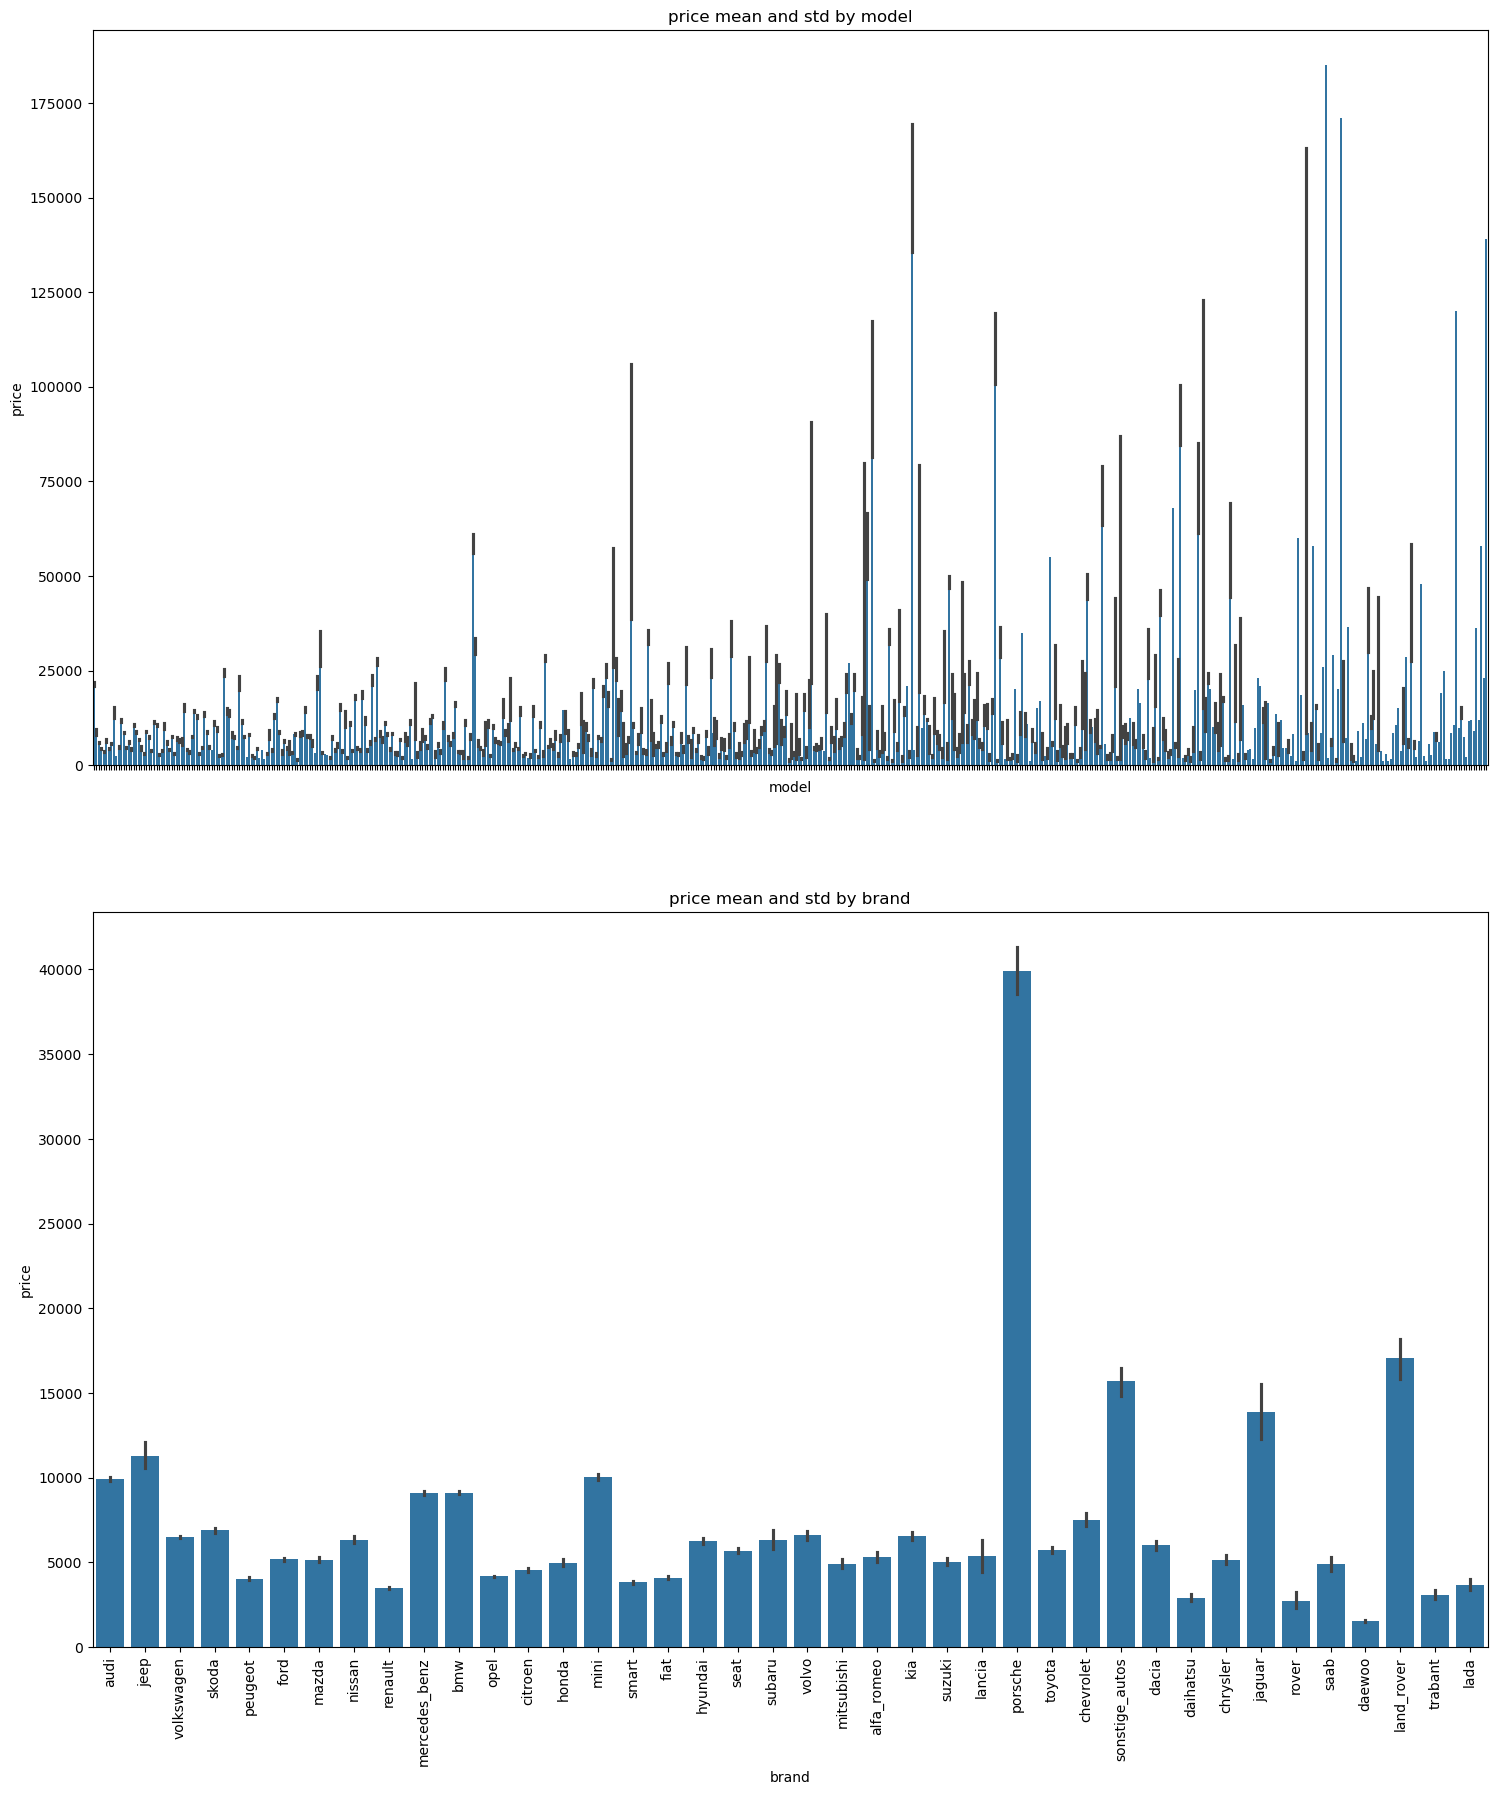

In [56]:
# model brand
nrows, ncols = 2, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))

# plot model distribution
sns.barplot(y='price', x='model', data=df, ax=axs[0])
axs[0].set_title("price mean and std by model")
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_xticklabels([])

# plot brand distribution
sns.barplot(y='price', x='brand', data=df, ax=axs[1])
axs[1].set_title("price mean and std by brand")
axs[1].tick_params(axis='x', rotation=90)

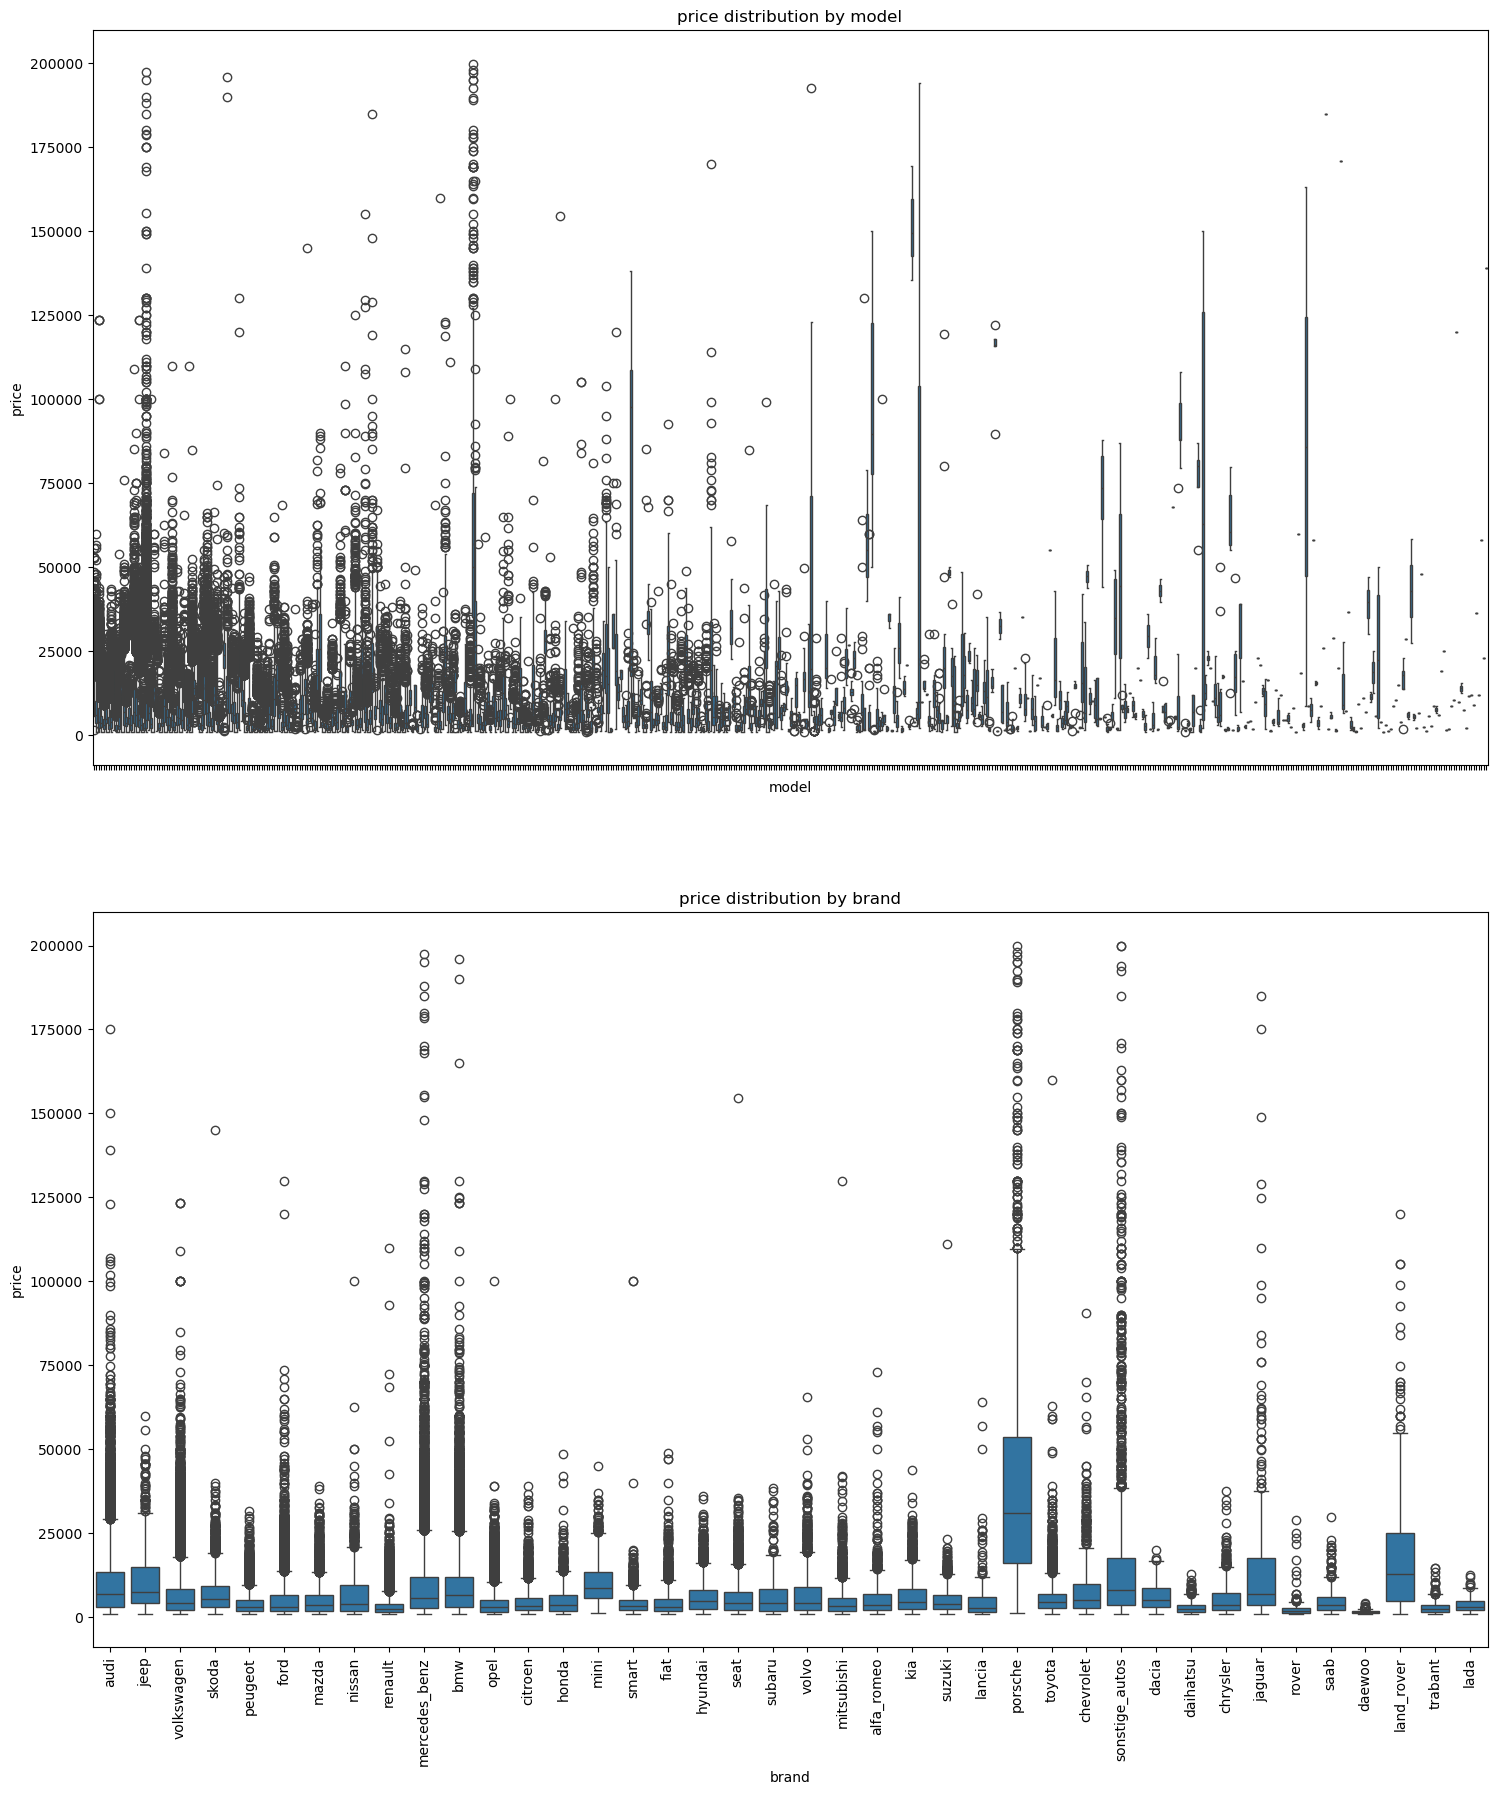

In [57]:
# model brand
nrows, ncols = 2, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))

# plot model distribution
sns.boxplot(y='price', x='model', data=df, ax=axs[0])
axs[0].set_title("price distribution by model")
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_xticklabels([])

# plot brand distribution
sns.boxplot(y='price', x='brand', data=df, ax=axs[1])
axs[1].set_title("price distribution by brand")
axs[1].tick_params(axis='x', rotation=90)

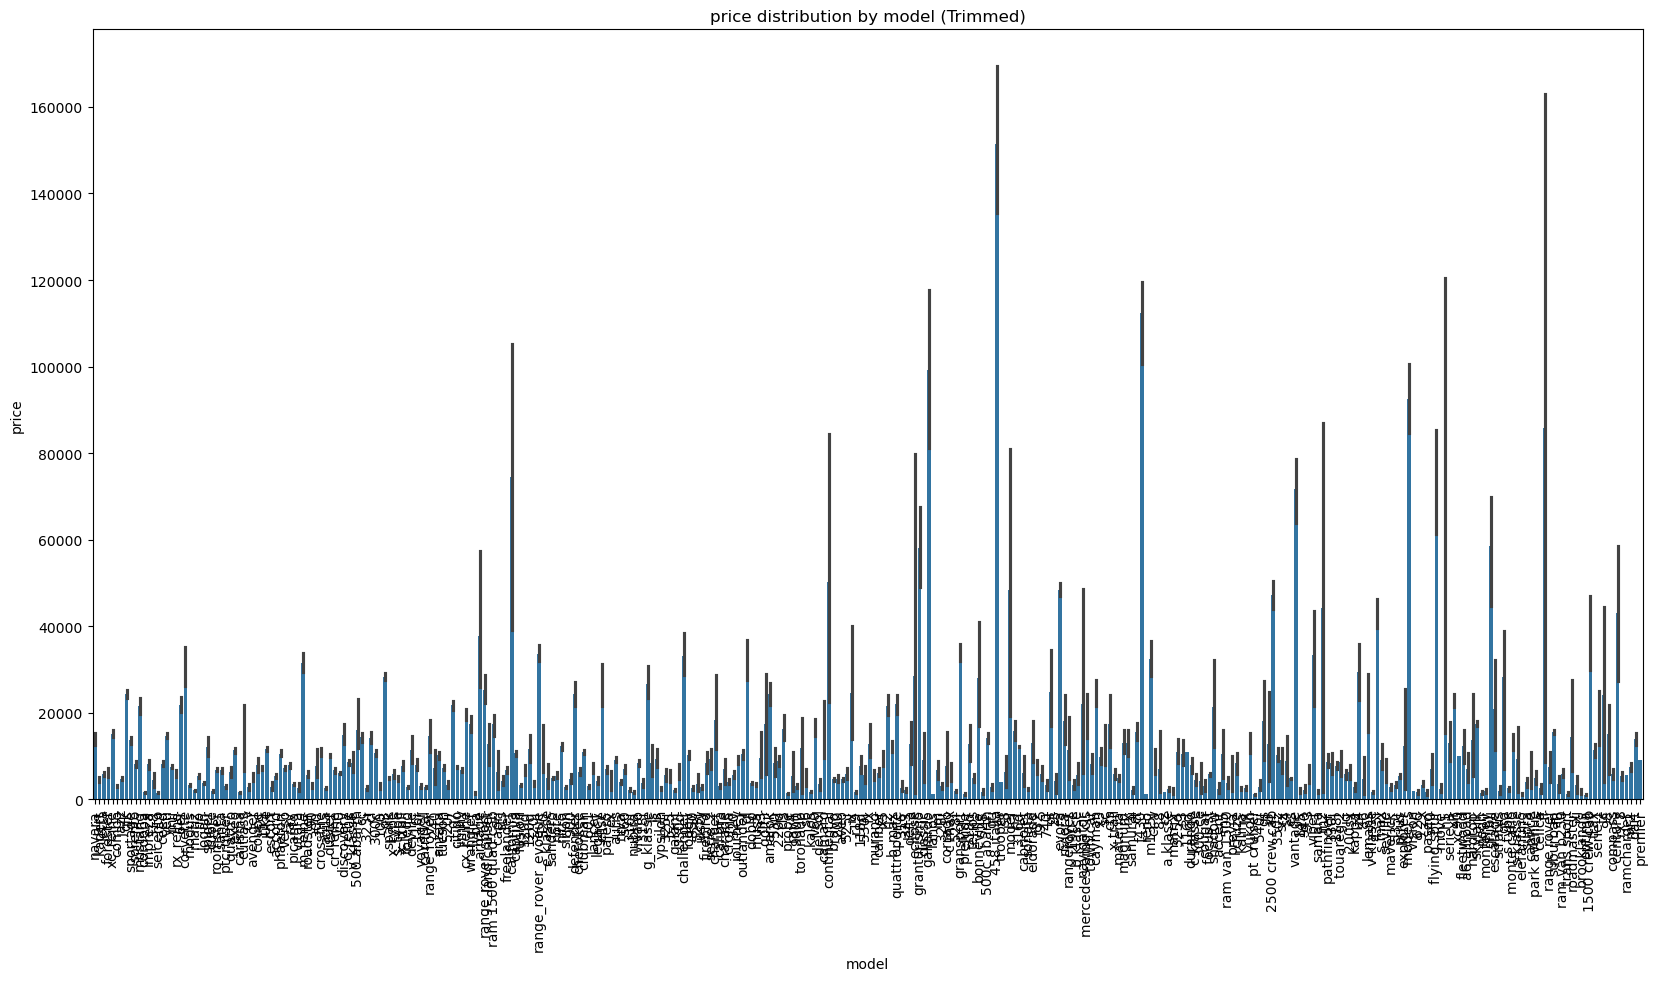

In [58]:

# Count how many times each model appears
model_counts = df['model'].value_counts()

# Determine quantile thresholds
q_low, q_high = model_counts.quantile([0.22, 0.78])

# Keep models within those frequency bounds
valid_models = model_counts[(model_counts >= q_low) & (model_counts <= q_high)].index

# Filter the DataFrame
df_trimmed = df[df['model'].isin(valid_models)]

# Plotting
nrows, ncols = 1, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Model plot
sns.barplot(y='price', x='model', data=df_trimmed)
axs.set_title("price distribution by model (Trimmed)")
axs.tick_params(axis='x', rotation=90)

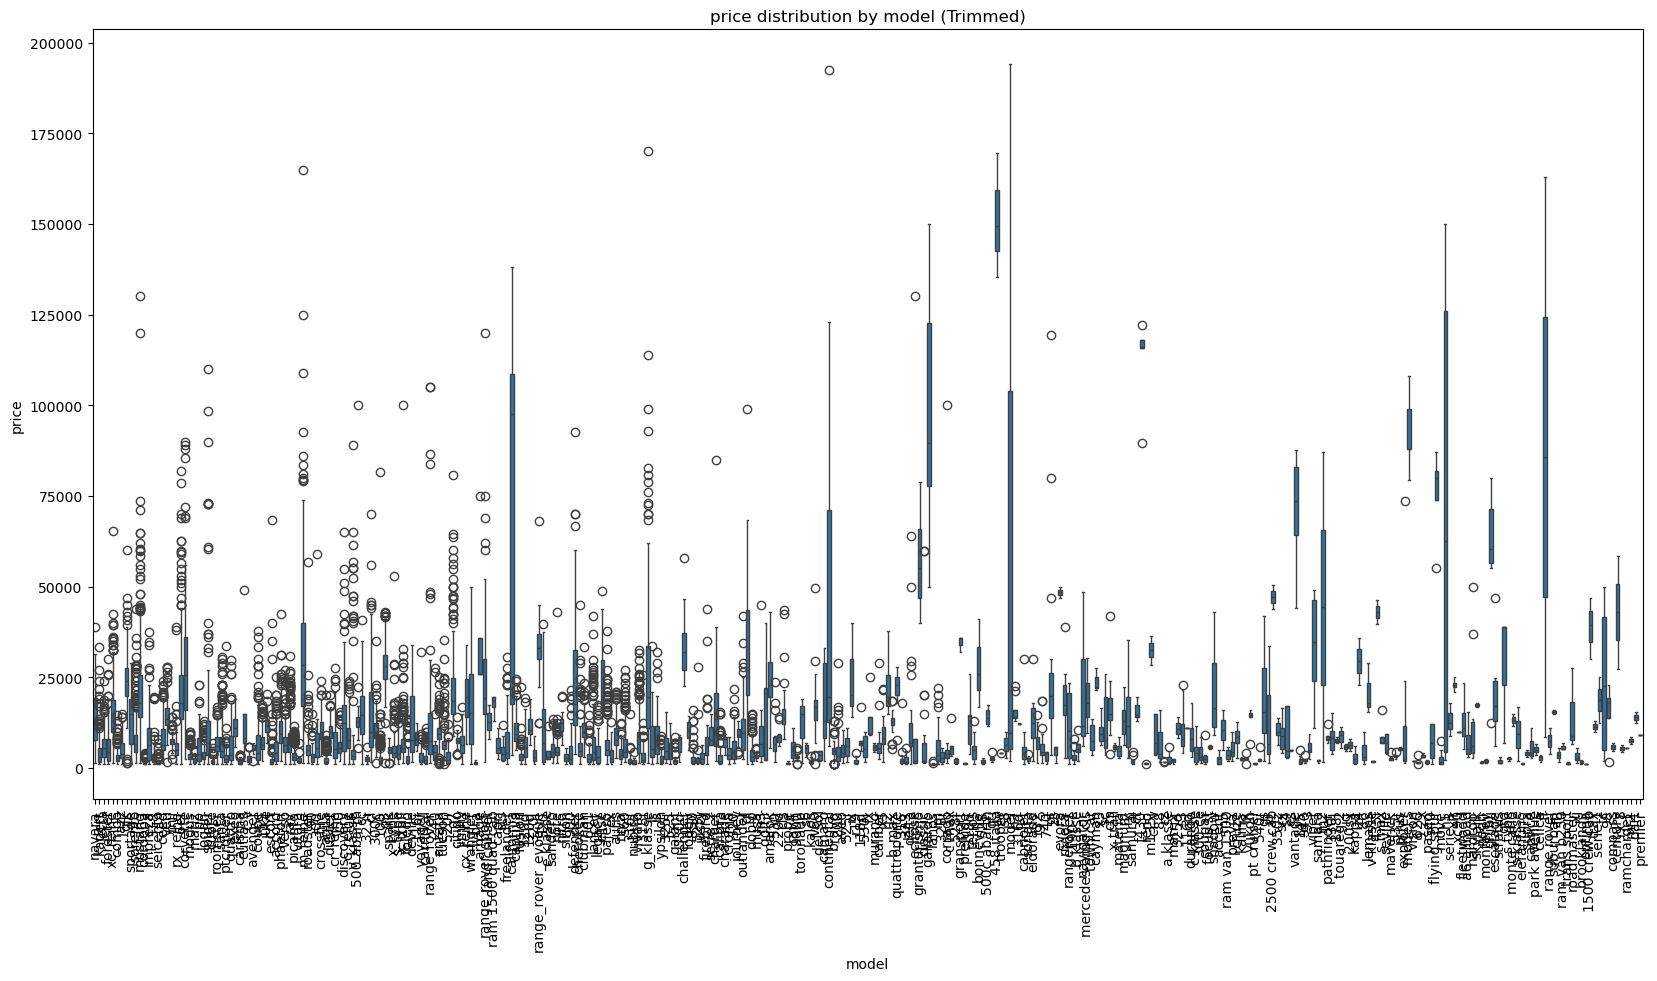

In [59]:

# Count how many times each model appears
model_counts = df['model'].value_counts()

# Determine quantile thresholds
q_low, q_high = model_counts.quantile([0.22, 0.78])

# Keep models within those frequency bounds
valid_models = model_counts[(model_counts >= q_low) & (model_counts <= q_high)].index

# Filter the DataFrame
df_trimmed = df[df['model'].isin(valid_models)]

# Plotting
nrows, ncols = 1, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

# Model plot
sns.boxplot(y='price', x='model', data=df_trimmed)
axs.set_title("price distribution by model (Trimmed)")
axs.tick_params(axis='x', rotation=90)

* model:
   * we can see very clearly that there's a high correlation between model and price
   * for most values, there's high deviation
   * different models within the same brand vary in price, for example 911 and cayenne are both porsche
* brand:
   * we can see very clearly that there's a high correlation between brand and price
   * most brands have low deviation except for a few... this needs more investigation

#### General observations:
* perhaps the reason behind each deviation of a brand, is in it's various models
* a car of the same model might have not repaired damage, might be older, or vary in any of the rest features that have a correlation to price
* each brand or model has outliers, some more than others

In [61]:
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage', 'brand', 'model']
for feature in categorical_features:
    print(df.groupby(feature)['price'].agg(['mean', 'std', 'median']))
    print(df.groupby(feature)['price'].count())
    print('='*60)

                mean          std  median
abtest                                   
control  7172.128118  8673.668750  4350.0
test     7206.628830  8856.925719  4350.0
abtest
control    138700
test       149317
Name: price, dtype: int64
                     mean           std   median
vehicleType                                     
andere        5471.232106   6046.648073   3500.0
bus           7235.801488   7073.876814   4990.0
cabrio       11042.387775  13759.333131   6950.0
coupe        12632.092857  17092.246038   6999.0
kleinwagen    3943.455187   3475.049264   2799.0
kombi         6810.304184   6574.001022   4500.0
limousine     7002.402649   7400.384565   4490.0
suv          13567.219032  11297.219903  10999.0
vehicleType
andere         2417
bus           27419
cabrio        21399
coupe         16197
kleinwagen    51570
kombi         55588
limousine     78602
suv           14176
Name: price, dtype: int64
                   mean           std  median
gearbox                      

In [62]:
bins_df = df.copy()
bins_df['price_category'] = pd.cut(df['price'], bins=[0, 5000, 10_000, 50_000, np.inf], labels=["low", "low average", "middle average", "high"])
bins_df.head()

,index,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_category
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,a5,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,middle average
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,low average
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,low
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,low
6,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,67112,2016-04-05 18:18:39,low


Text(0, 0.5, 'Frequency')

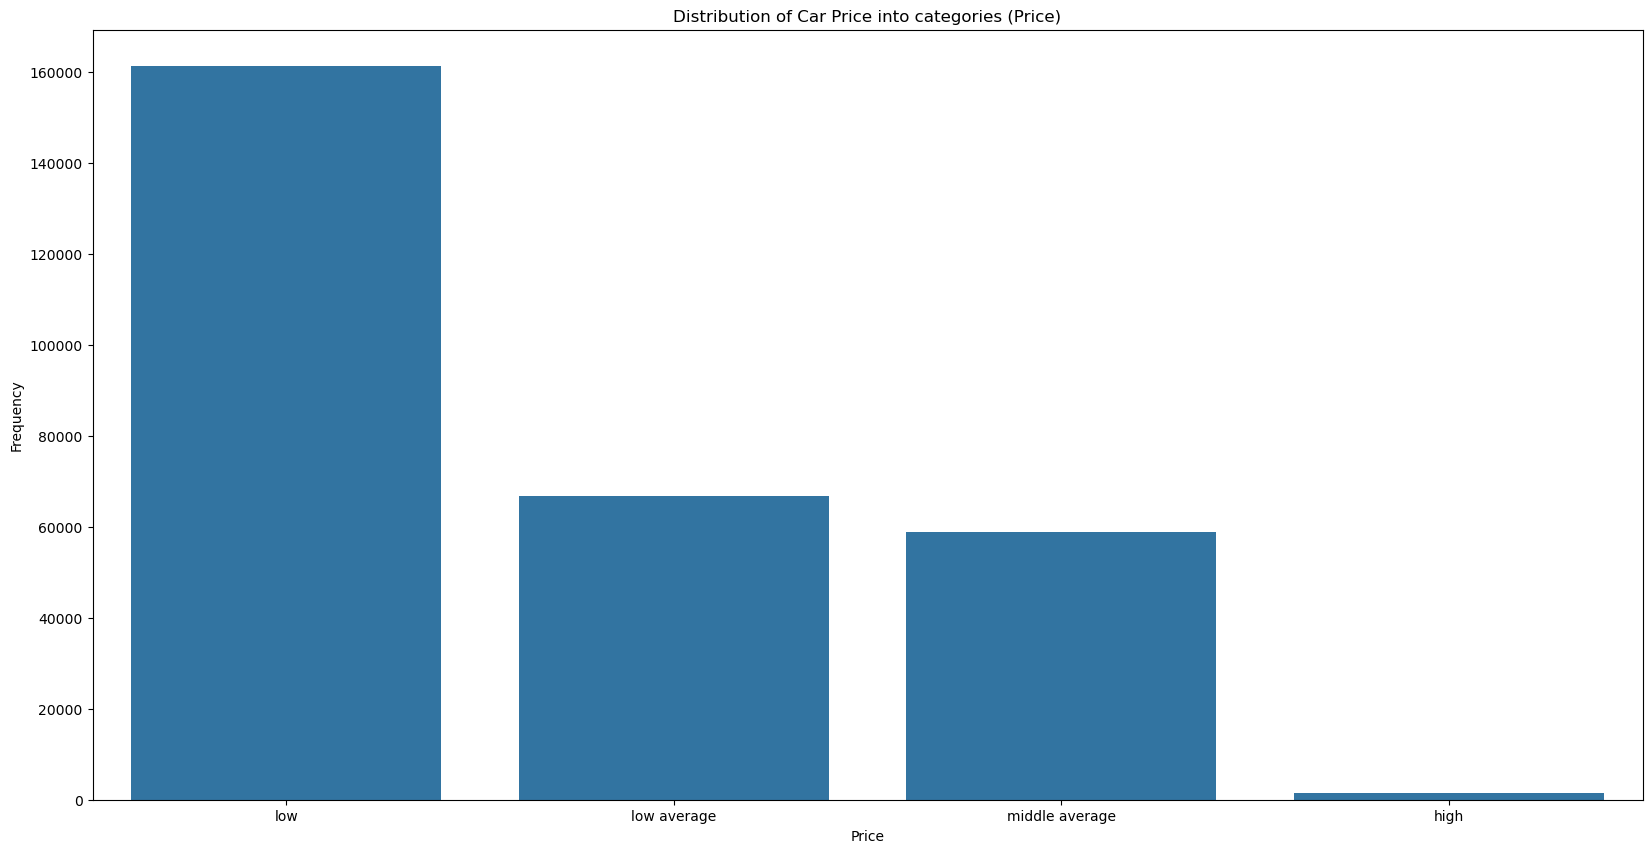

In [63]:
# distribution
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=bins_df, x="price_category")
ax.set_title("Distribution of Car Price into categories (Price)")
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")

Dominant bin is low, meaning our model will perform better on cars with lower prices, also decent on average prices. Since we have very few high instances, our model will sruggle for such prices

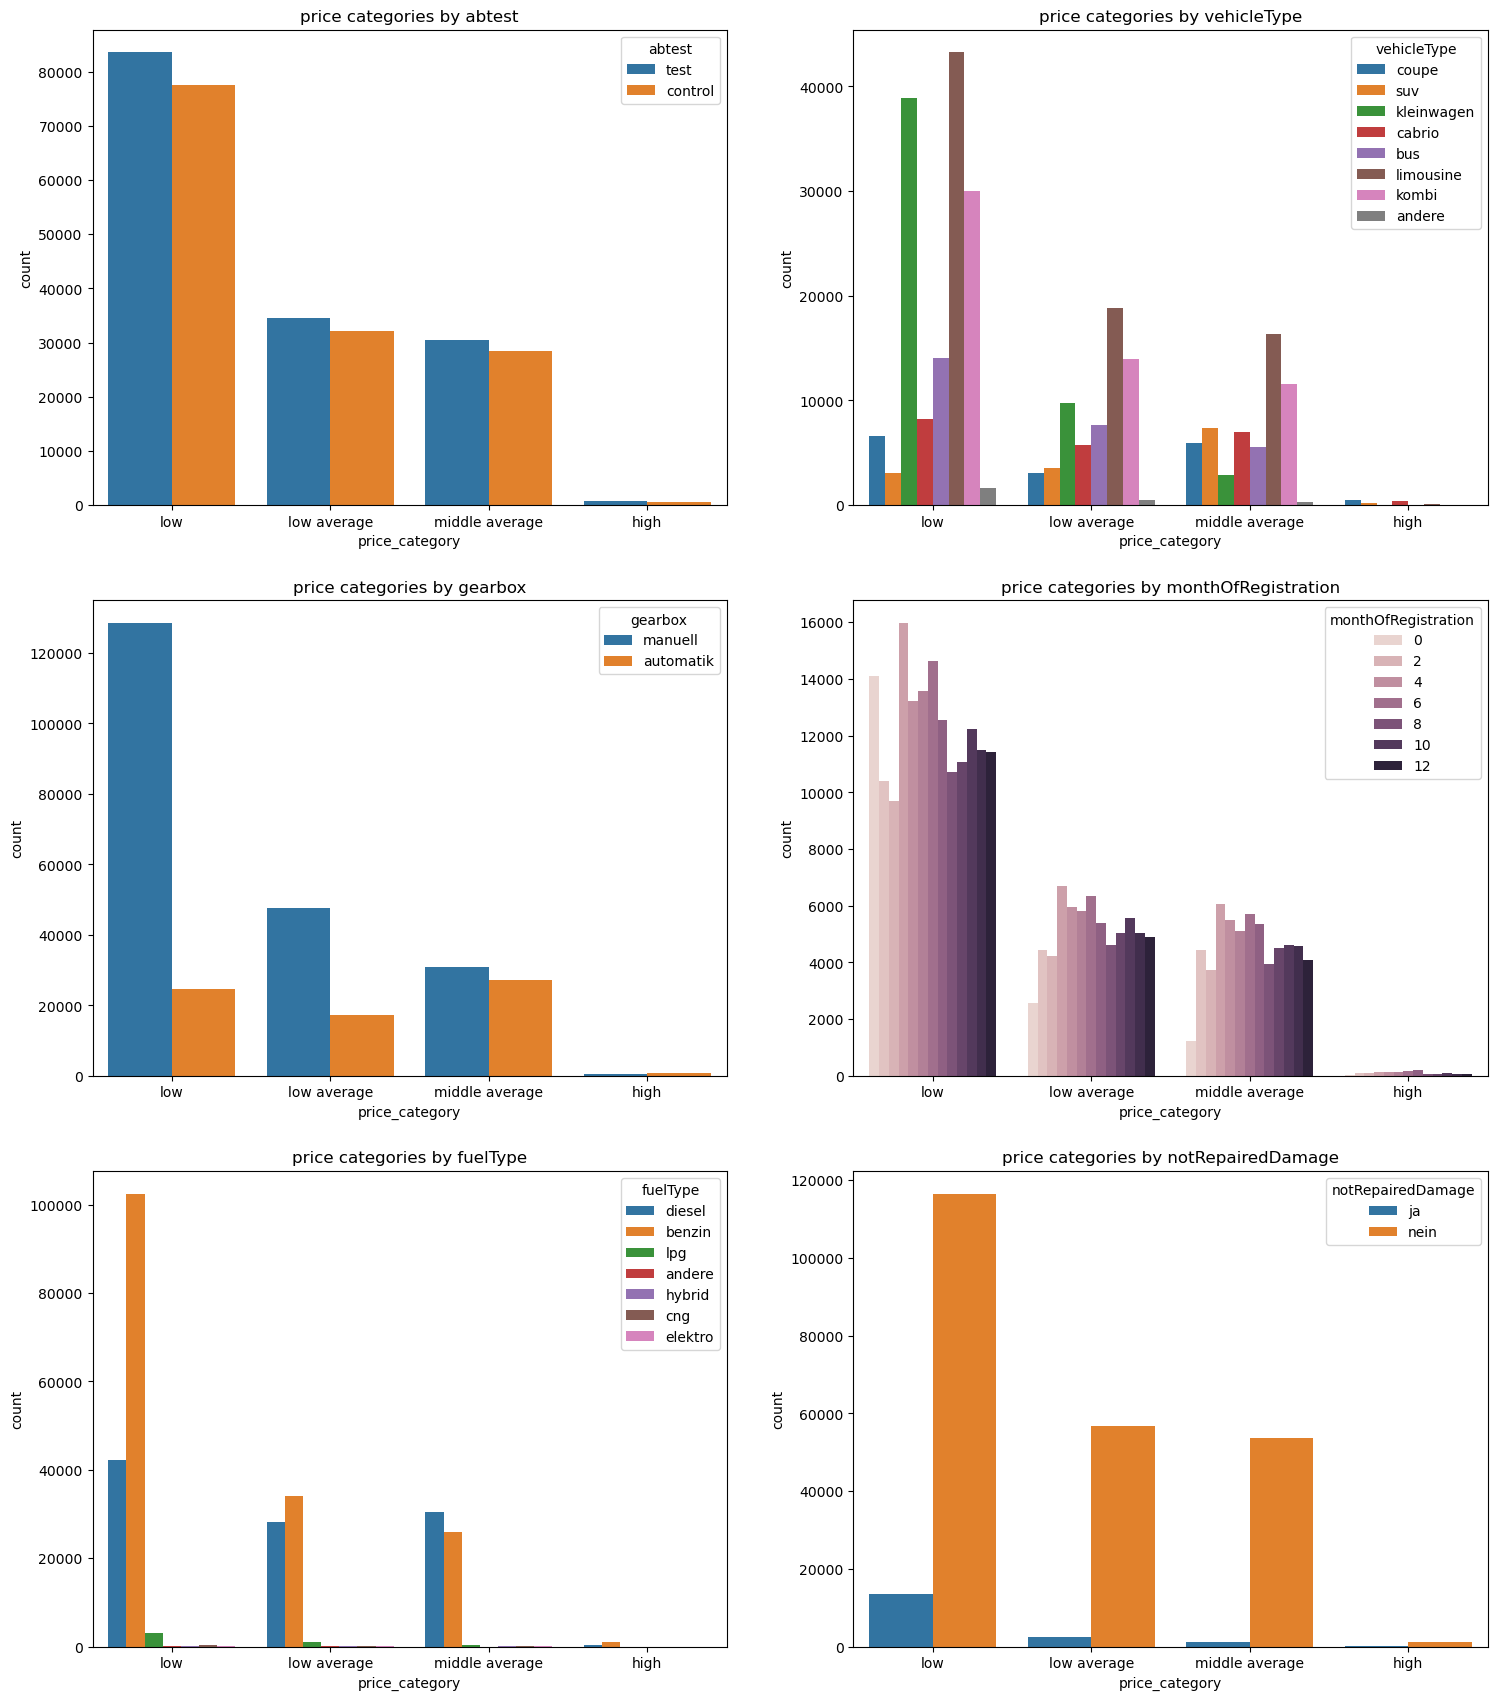

In [65]:
categorical_features = ['abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage']
nrows, ncols = 3, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i, j = 0, 0
for feature in categorical_features:
    sns.countplot(x='price_category', hue=feature, data=bins_df, ax=axs[i,j])
    axs[i,j].set_title(f"price categories by {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0

## Numerical Features Analysis

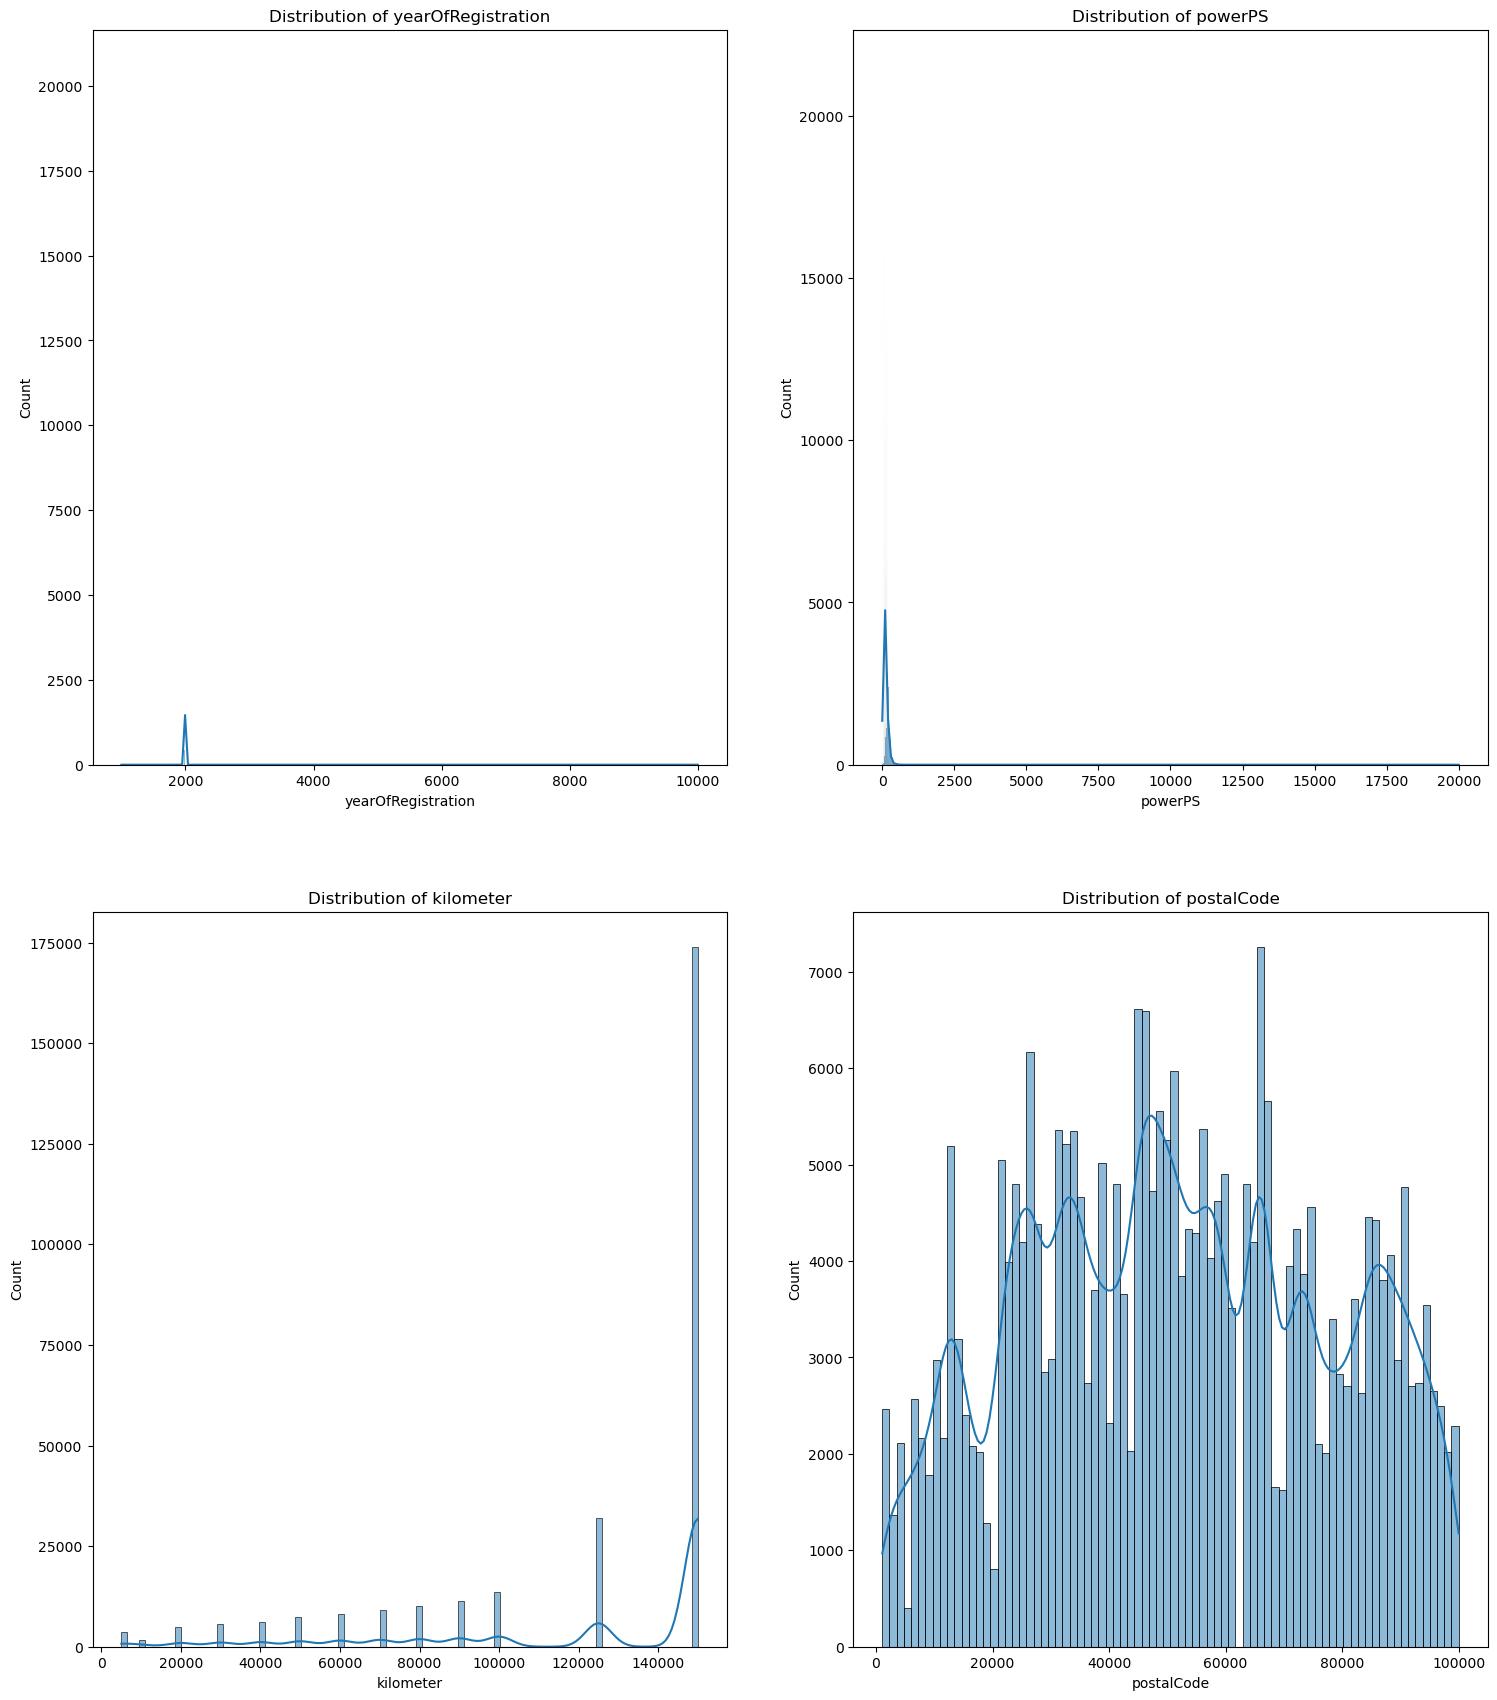

In [67]:
numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer', 'postalCode']
nrows,ncols = 2,2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,21))
i,j = 0,0
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, ax=axs[i,j])
    axs[i,j].set_title(f"Distribution of {feature}")
    j = j + 1
    if j % ncols == 0:
        i = i + 1
        j = 0

In [68]:
# all yearOfRegistration values less than 1920 are invalid (we have checked one by one)
# all values that we have checked over 1920 seem valid
tmp = df[(df['yearOfRegistration'] < 1940) & (df['yearOfRegistration'] > 1920)]
tmp

,index,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2376,2376,2016-03-15 21:44:32,Andere_Andere,1800,control,cabrio,1925,NaN,0,andere,5000,1,NaN,sonstige_autos,nein,2016-03-15 00:00:00,79288,2016-04-07 05:15:34
10549,10549,2016-03-17 20:43:12,Ford_V8_Cabrio_im_restaurierten_Topzustand,35000,control,cabrio,1937,manuell,90,andere,5000,6,benzin,ford,nein,2016-03-17 00:00:00,50859,2016-04-07 09:15:29
12468,12468,2016-03-22 10:50:14,Opel_Olympia_Cabrio_1936_Top_Zustand,21900,control,cabrio,1936,manuell,23,andere,5000,7,benzin,opel,nein,2016-03-22 00:00:00,78467,2016-04-05 22:44:48
17320,17320,2016-03-07 13:44:34,Andere_Adler_Trumpf_1_7_AV___sehr_selten__top_...,32000,control,limousine,1933,manuell,38,andere,5000,7,benzin,sonstige_autos,nein,2016-03-07 00:00:00,17109,2016-04-06 03:45:49
23714,23714,2016-03-23 11:37:57,Oldtimer_Citroën_F_AC_4_Bj_29,14000,test,limousine,1929,manuell,30,None,5000,7,benzin,sonstige_autos,NaN,2016-03-23 00:00:00,90475,2016-04-05 11:18:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340960,340960,2016-03-20 18:42:40,Chevrolet_Holden_Vorkriegsfahrzeug,24500,test,cabrio,1935,NaN,0,andere,5000,5,NaN,chevrolet,nein,2016-03-20 00:00:00,44229,2016-04-07 01:46:40
351845,351845,2016-03-27 12:44:33,Opel_kadett_po_renovaci,9000,test,limousine,1938,manuell,1,kadett,5000,0,benzin,opel,NaN,2016-03-27 00:00:00,93437,2016-03-27 12:44:33
352421,352421,2016-03-11 11:51:33,BMW_DIXI_OLDTIMER,20000,control,coupe,1929,manuell,12,andere,10000,4,benzin,bmw,NaN,2016-03-11 00:00:00,74523,2016-04-07 05:45:00
354533,354533,2016-03-05 17:45:32,Ford_Business_Coupe_Hotrod_Projekt.1937,7000,test,coupe,1937,manuell,85,andere,5000,8,benzin,ford,ja,2016-03-05 00:00:00,8359,2016-04-07 10:44:39


Text(0.5, 1.0, 'Distribution of yearOfRegistration')

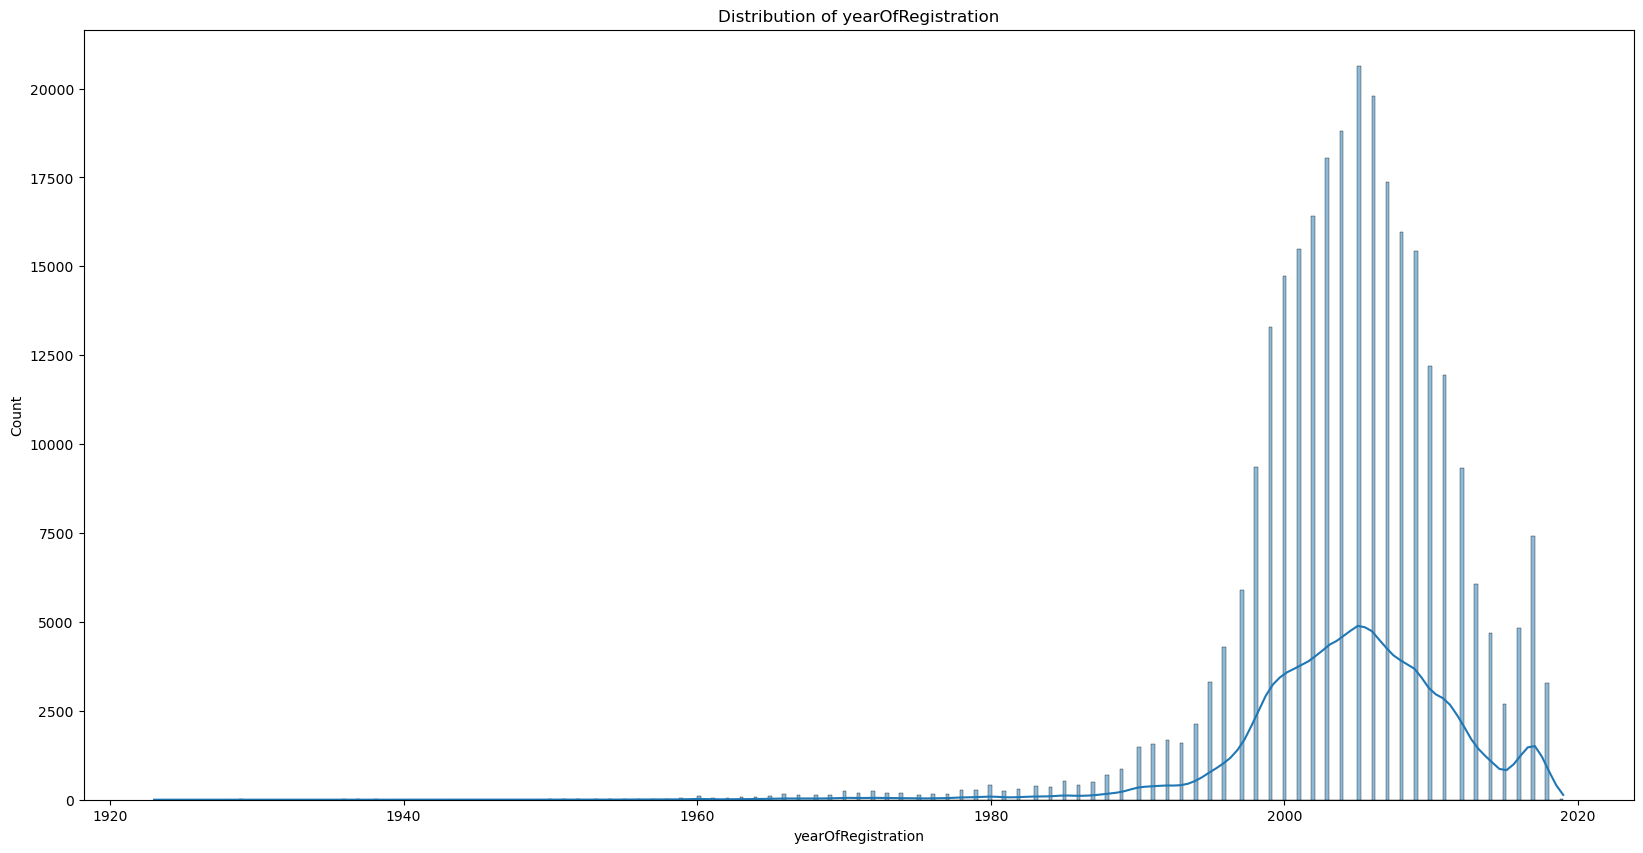

In [69]:
# For Valid year of registration
df_valid_yearOfRegistration = df[(df['yearOfRegistration'] >= 1920) & (df['yearOfRegistration'] <= 2025)]
nrows,ncols = 1,1
fig, axs = plt.subplots(nrows, ncols, figsize=(20,10))

sns.histplot(df_valid_yearOfRegistration['yearOfRegistration'], kde=True)
axs.set_title(f"Distribution of yearOfRegistration")

In [70]:
# Do not anything before split
df["yearOfRegistration"].sort_values(ascending=True).head(n=20)
df[(df["yearOfRegistration"] < 1920) | (df["yearOfRegistration"] > 2025)].count()

index                  82
dateCrawled            82
name                   82
price                  82
abtest                 82
vehicleType             4
yearOfRegistration     82
gearbox                27
powerPS                82
model                  53
kilometer              82
monthOfRegistration    82
fuelType               30
brand                  82
notRepairedDamage      11
dateCreated            82
postalCode             82
lastSeen               82
dtype: int64

In [71]:
# all powerPS values greater than 1500 are assumed to be invalid for cars up to 200,000 price
df["powerPS"].sort_values(ascending=True).head(n=20)
df[df["powerPS"] > 1500].count()

index                  145
dateCrawled            145
name                   145
price                  145
abtest                 145
vehicleType            126
yearOfRegistration     145
gearbox                141
powerPS                145
model                  138
kilometer              145
monthOfRegistration    145
fuelType               123
brand                  145
notRepairedDamage       92
dateCreated            145
postalCode             145
lastSeen               145
dtype: int64

Text(0.5, 1.0, 'Distribution of powerPS')

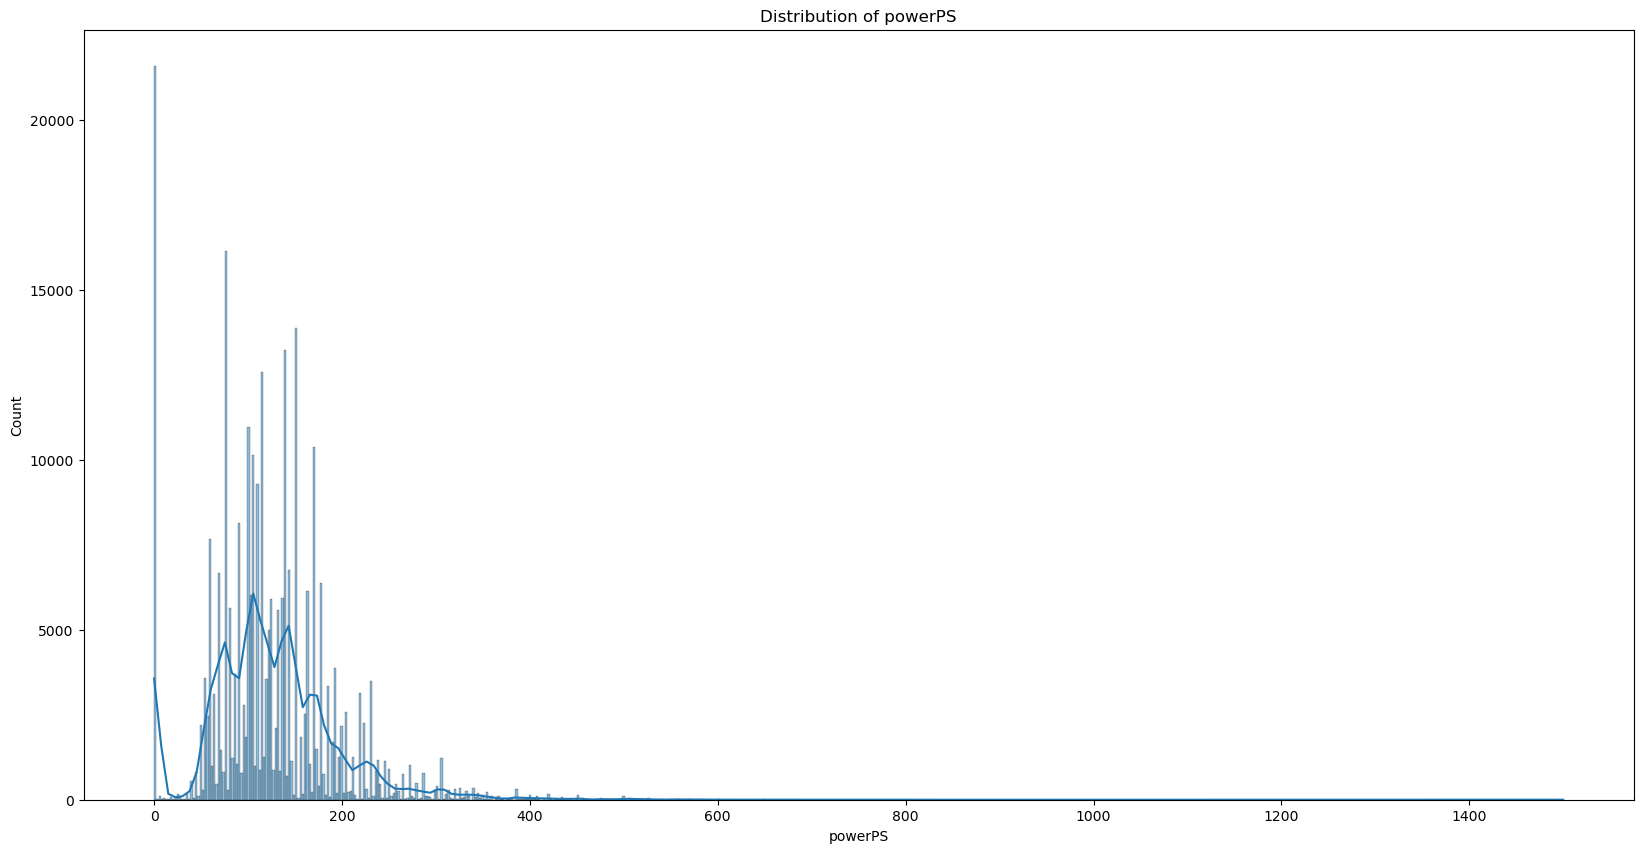

In [72]:
df_valid_powerPS = df[df['powerPS'] <= 1500]
nrows,ncols = 1,1
fig, axs = plt.subplots(nrows, ncols, figsize=(20,10))

sns.histplot(df_valid_powerPS['powerPS'], kde=True)
#sns.histplot(df['yearOfRegistration'], kde=True)
axs.set_title(f"Distribution of powerPS")

In [73]:
numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer', 'postalCode']
for feature in numerical_features:
    print(f"{feature} skewness:", df[feature].skew())
    print("="*50)
    
for feature in numerical_features:
    print(f"\nNormality tests for {feature}\n" + "="*50)
    results = run_normality_tests(df[feature])
    for test, result in results.items():
        print(f"{test}: {result}")

yearOfRegistration skewness: 93.77642024167571
powerPS skewness: 61.29150508721013
kilometer skewness: -1.3178216164954029
postalCode skewness: 0.02267863070850571

Normality tests for yearOfRegistration
Anderson-Darling Test: {'Statistic': 86258.64867950621, 'Critical Values': array([0.576, 0.656, 0.787, 0.918, 1.092]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Normal': False}
Kolmogorov-Smirnov Test: {'Statistic': 0.41983830884173523, 'p-value': 0.0, 'Normal': False}
D’Agostino and Pearson’s Test: {'Statistic': 1118898.000310177, 'p-value': 0.0, 'Normal': False}
Jarque-Bera Test: {'Statistic': 1164911791940.7095, 'p-value': 0.0, 'Normal': False}
Lilliefors Test: {'Statistic': 0.4198384457450258, 'p-value': 0.0009999999999998899, 'Normal': False}

Normality tests for powerPS
Anderson-Darling Test: {'Statistic': 44704.8295964764, 'Critical Values': array([0.576, 0.656, 0.787, 0.918, 1.092]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Normal': Fa

In [74]:
df_tmp = df.copy()
df_tmp = df_tmp[(df_tmp['yearOfRegistration'] >= 1920) & (df_tmp['yearOfRegistration'] <= 2025)]
df_tmp = df_tmp[df_tmp['powerPS'] <= 1500]

numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer', 'postalCode']
for feature in numerical_features:
    print(f"{feature} skewness:", df_tmp[feature].skew())
    print("="*50)
    
for feature in numerical_features:
    print(f"\nNormality tests for {feature}\n" + "="*50)
    results = run_normality_tests(df_tmp[feature])
    for test, result in results.items():
        print(f"{test}: {result}")

yearOfRegistration skewness: -1.6622249982353725
powerPS skewness: 1.8975890456475286
kilometer skewness: -1.3178486057657628
postalCode skewness: 0.022541800323230027

Normality tests for yearOfRegistration
Anderson-Darling Test: {'Statistic': 3451.539508797112, 'Critical Values': array([0.576, 0.656, 0.787, 0.918, 1.092]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Normal': False}
Kolmogorov-Smirnov Test: {'Statistic': 0.09232162710674618, 'p-value': 0.0, 'Normal': False}
D’Agostino and Pearson’s Test: {'Statistic': 112277.97273597145, 'p-value': 0.0, 'Normal': False}
Jarque-Bera Test: {'Statistic': 925344.895135896, 'p-value': 0.0, 'Normal': False}
Lilliefors Test: {'Statistic': 0.09232201731745693, 'p-value': 0.0009999999999998899, 'Normal': False}

Normality tests for powerPS
Anderson-Darling Test: {'Statistic': 3803.024210586387, 'Critical Values': array([0.576, 0.656, 0.787, 0.918, 1.092]), 'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Normal

### Observations:
* ALL numerical features except postalCode are skewed
* NO numerical feature follows normal distribution